In [1]:
%pip install tqdm

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Note: you may need to restart the kernel to use updated packages.


In [1]:
from processing_functions import create_df
start_date = "2023-03-24 12:00"
end_date = "2025-02-10 10:00"
df_main = create_df(timeFramesUsedInMinutes=["1","5", "15"], instrument="ES", 
                    start_date = start_date, end_date = end_date, putVolumeInData=False) 

In [4]:
from processing_functions import create_df
start_date = "2023-03-24 12:00"
end_date = "2025-02-10 10:00"
df_main = create_df(timeFramesUsedInMinutes=["5","15", "60"], instrument="ES", 
                    start_date = start_date, end_date = end_date, putVolumeInData=False) 

In [5]:
df_main[['datetime','open', 'high', 'low', 'close', 'ATR']]

,datetime,open,high,low,close,ATR
0,2023-03-29 20:00:00,4058.50,4059.00,4056.25,4057.25,3.857143
1,2023-03-29 20:05:00,4057.25,4058.75,4057.00,4058.25,3.857143
2,2023-03-29 20:10:00,4058.00,4058.75,4058.00,4058.25,3.410714
3,2023-03-29 20:15:00,4058.25,4059.00,4058.25,4058.50,3.232143
4,2023-03-29 20:20:00,4058.50,4059.25,4058.25,4059.00,3.017857
...,...,...,...,...,...,...
132145,2025-02-10 09:40:00,6071.75,6071.75,6069.75,6070.50,1.964286
132146,2025-02-10 09:45:00,6070.50,6070.50,6067.50,6069.50,1.946429
132147,2025-02-10 09:50:00,6069.50,6070.75,6068.75,6070.00,1.928571
132148,2025-02-10 09:55:00,6070.00,6071.25,6069.50,6071.00,1.946429


In [6]:
df_main.isna().sum()


datetime            0
close               0
high                0
low                 0
open                0
high_before_low     0
tenkan              0
kijun               0
ssa                 0
ssb                 0
chikou             26
ssb_15              0
kijun_15            0
ssb_60              0
kijun_60            0
PP                  0
R1                  0
R2                  0
R3                  0
S1                  0
S2                  0
S3                  0
Previous Close      0
TR                  0
ATR                 0
dtype: int64

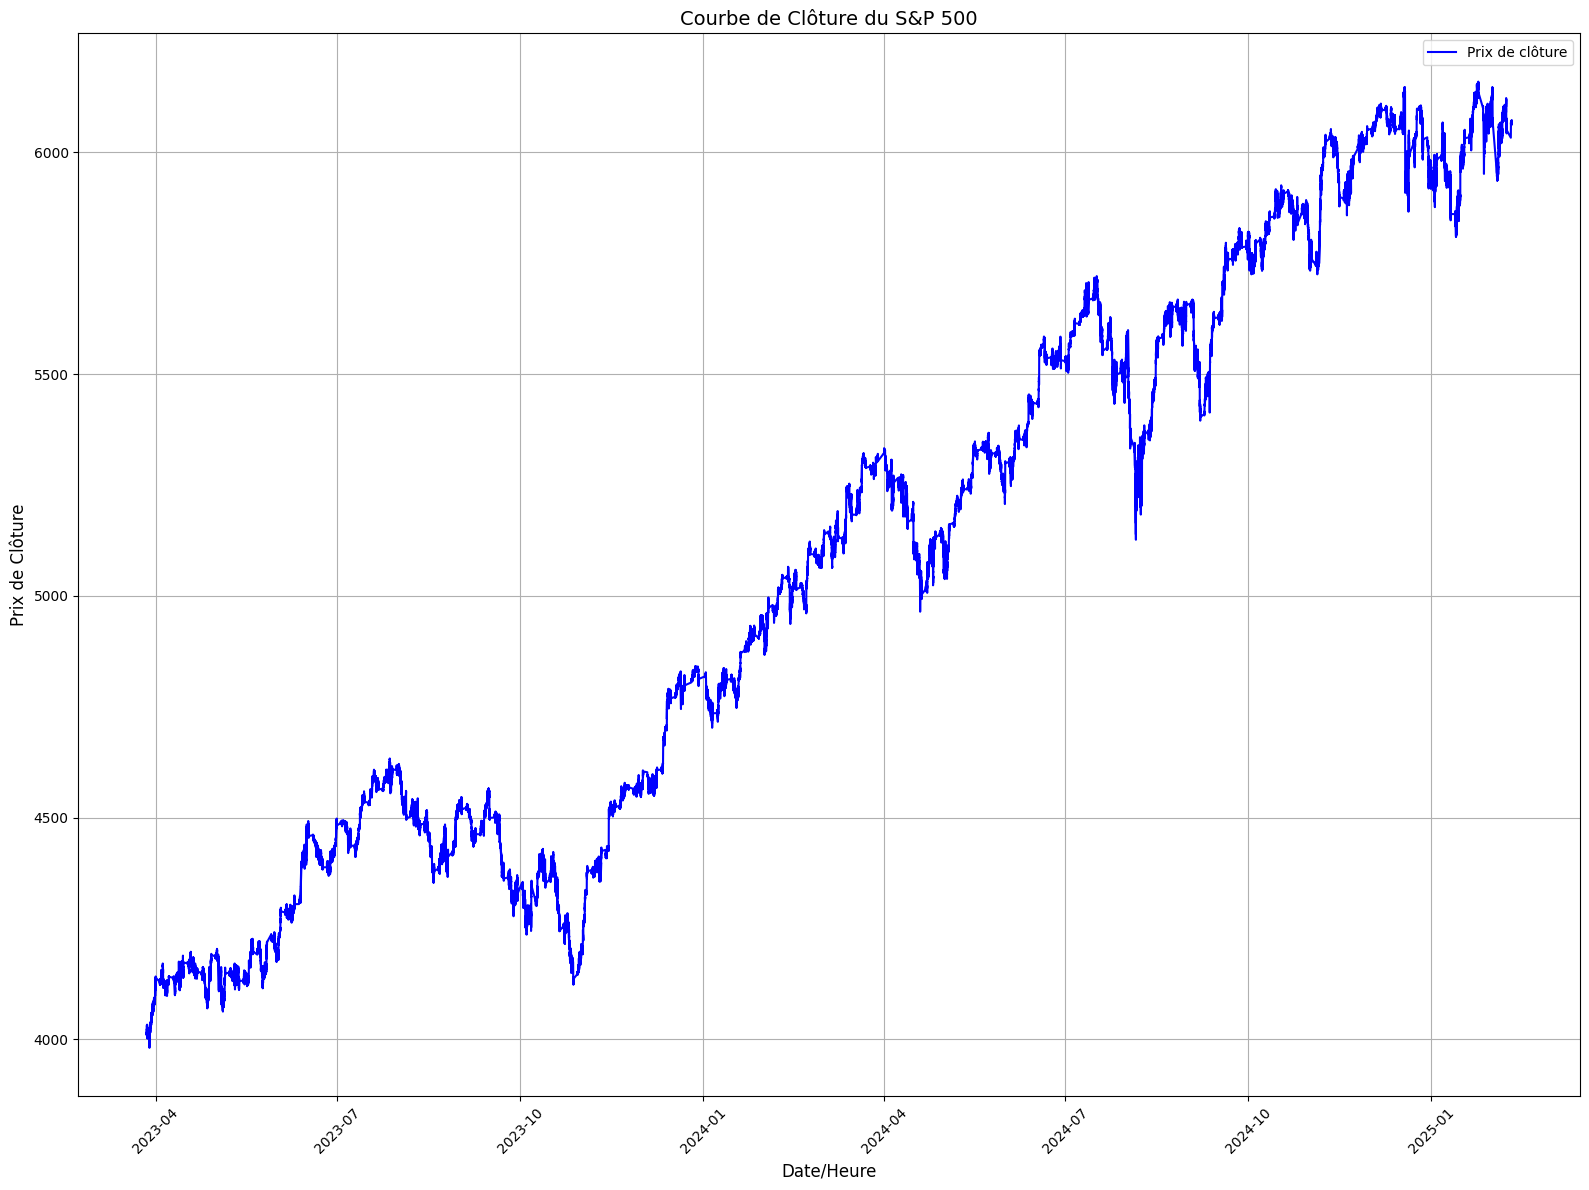

In [4]:

import matplotlib.pyplot as plt 
plt.figure(figsize=(16,12))
plt.plot(df_main['datetime'], df_main['close'], label='Prix de clôture', color='b')
plt.title('Courbe de Clôture du S&P 500', fontsize=14)
plt.xlabel('Date/Heure', fontsize=12)
plt.ylabel('Prix de Clôture', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()

In [5]:
import matplotlib.pyplot as plt 

# Extraire l'heure de la journée à partir de 'timestamp'
df_main['hour'] = df_main['datetime'].dt.hour

# Calculer le volume moyen pour chaque heure
volume_moyen_par_heure = df_main.groupby('hour')['volume'].mean()

# Affichage des résultats sous forme d'histogramme
plt.figure(figsize=(16, 12))
volume_moyen_par_heure.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Volume moyen en fonction de l\'heure de la journée', fontsize=14)
plt.xlabel('Heure de la journée', fontsize=12)
plt.ylabel('Volume moyen', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Afficher l'histogramme
plt.tight_layout()
plt.show()

KeyError: 'Column not found: volume'

### 5 MIN MAIN TIMEFRAME TESTS ###

In [ ]:
from processing_functions import return_trade_datas_dataframe
filename = 'result_file51560'
filepath = f"ES/2023-03-24_12-00_2025-02-10_10-00/{filename}.pkl"
tradeDatasFormated = return_trade_datas_dataframe(filepath, sort_option=2) #start_date="2025-01-01 00:00:00", end_date="2025-02-14 12:00:00")
tradeDatasFormated.tail(5) # only > or < SSB in high TF

,Winrate [%],Total return brut [%],Total return net [%],Avg. gain net [%],Avg. loss net [%],Risk ratio,Nbr Wins/Loss/Breakeven,Avg. executed TP [Ticks],Avg. executed SL [Ticks],"[SL1, TP1] / [SL2, TP2] [Ticks]",Q2 duration (médiane),Q3 duration (75%),timeframes,bracketsModifier,percentHitToMoveTP,tpToMoveInTicks,nbrTimeMaxMoveTP,stopMethodsForKijunExitExit,"maxLossStreak, avgLossStreak"
1,61.920,68.85,67.01,0.855,-1.113,0.77,"(400, 246, 1)",34.3,44.6,"(50, 25, 55, 60)",0 days 01:10:00,0 days 03:02:30,"[5, 15, 60]","[[0.6, -0.5]]",0.4,14,2,0,"(7, 1.91)"
28,76.429,69.68,67.68,0.518,-1.263,0.41,"(535, 165, 1)",20.9,50.7,"(55, 25, 55, 60)",0 days 00:40:00,0 days 02:05:00,"[5, 15, 60]","[[0.6, -0.5]]",0.4,14,2,1,"(19, 2.72)"
13,62.166,70.49,68.68,0.855,-1.115,0.77,"(396, 241, 1)",34.3,44.7,"(50, 25, 55, 65)",0 days 01:12:30,0 days 03:05:00,"[5, 15, 60]","[[0.6, -0.5]]",0.4,14,2,0,"(7, 1.92)"
16,75.793,72.42,70.45,0.515,-1.185,0.44,"(526, 168, 1)",20.7,47.6,"(50, 25, 55, 65)",0 days 00:35:00,0 days 02:05:00,"[5, 15, 60]","[[0.6, -0.5]]",0.4,14,2,1,"(13, 2.64)"
4,75.641,73.70,71.70,0.517,-1.178,0.44,"(531, 171, 1)",20.8,47.3,"(50, 25, 55, 60)",0 days 00:35:00,0 days 02:05:00,"[5, 15, 60]","[[0.6, -0.5]]",0.4,14,2,1,"(13, 2.66)"


In [10]:
from processing_functions import describe_daily_and_weekly_trade_datas
describe_daily_and_weekly_trade_datas(filepath, selected_Id=780)


      profit_including_fees_from_start(%)
                                      sum
count                          681.000000
mean                             0.060308
std                              1.010307
min                             -4.814200
25%                              0.000000
50%                              0.000000
75%                              0.622160
max                              4.299440 
       profit_including_fees_from_start(%)
                                      sum
count                           98.000000
mean                             0.419077
std                              2.698706
min                             -7.509080
25%                             -1.072860
50%                              0.566200
75%                              2.527710
max                              6.896600


In [1]:
from processing_functions import return_trade_datas_dataframe

filename = 'ES_m1_position=1_2025-04-18_15-37-01.312584'
filepath = f"ES/2023-03-24_12-00_2025-02-10_10-00/{filename}.pkl"

tradeDatasFormated = return_trade_datas_dataframe(filepath, sort_option=2) #start_date="2025-01-01 00:00:00", end_date="2025-02-14 12:00:00")
tradeDatasFormated 

,Winrate [%],Total return brut [%],Total return net [%],Avg. gain net [%],Avg. loss net [%],Risk ratio,Nbr Wins/Loss/Breakeven,Avg. executed TP [Ticks],Avg. executed SL [Ticks],"[SL1, TP1] / [SL2, TP2] [Ticks]",...,Q3 duration (75%),timeframes,bracketsModifier,timeTPMovedToClose,slModifierAfterAlmostHit,percentSlAlmostHit,ratioDistanceKijun,tpToMoveInTicks,nbrTimeMaxMoveTP,"maxLossStreak, avgLossStreak"
2,65.537,26.42,15.62,0.626,-1.153,0.55,"(812, 427, 0)",25.4,45.8,"(50, 25, 55, 65)",...,0 days 02:18:30,"[1, 5, 15]","[[0.6, -0.5], [0.9, 0.2]]",1,0.1,0.7,0.5,10,2,"(10, 2.11)"
5,65.347,27.23,16.44,0.631,-1.151,0.56,"(809, 429, 0)",25.6,45.7,"(50, 25, 55, 65)",...,0 days 02:19:00,"[1, 5, 15]","[[0.6, -0.5], [0.9, 0.2]]",1,0.1,0.7,0.5,11,2,"(10, 2.11)"
6,64.677,32.53,21.71,0.634,-1.111,0.58,"(802, 438, 0)",25.7,44.1,"(50, 25, 55, 65)",...,0 days 02:19:00,"[1, 5, 15]","[[0.6, -0.5], [0.7, -0.1], [0.95, 0.45]]",1,0.1,0.7,0.5,11,2,"(10, 2.12)"
1,65.668,33.16,22.39,0.633,-1.159,0.56,"(811, 424, 0)",25.7,46.0,"(50, 25, 55, 65)",...,0 days 02:19:00,"[1, 5, 15]","[[0.7, -0.5]]",1,0.1,0.7,0.5,10,2,"(10, 2.09)"
4,65.612,33.24,22.49,0.636,-1.160,0.56,"(809, 424, 0)",25.8,46.1,"(50, 25, 55, 65)",...,0 days 02:19:00,"[1, 5, 15]","[[0.7, -0.5]]",1,0.1,0.7,0.5,11,2,"(10, 2.11)"
3,64.706,34.16,23.34,0.633,-1.107,0.58,"(803, 438, 0)",25.7,43.9,"(50, 25, 55, 65)",...,0 days 02:19:00,"[1, 5, 15]","[[0.6, -0.5], [0.7, -0.1], [0.95, 0.45]]",1,0.1,0.7,0.5,10,2,"(10, 2.1)"


In [2]:
from processing_functions import return_trade_datas_dataframe

filename = 'ES_m1_position=1_2025-04-18_16-34-48.202956'
filepath = f"ES/2023-03-24_12-00_2025-02-10_10-00/{filename}.pkl"

tradeDatasFormated = return_trade_datas_dataframe(filepath, sort_option=2) #start_date="2025-01-01 00:00:00", end_date="2025-02-14 12:00:00")
tradeDatasFormated 

,Winrate [%],Total return brut [%],Total return net [%],Avg. gain net [%],Avg. loss net [%],Risk ratio,Nbr Wins/Loss/Breakeven,Avg. executed TP [Ticks],Avg. executed SL [Ticks],"[SL1, TP1] / [SL2, TP2] [Ticks]",...,Q3 duration (75%),timeframes,bracketsModifier,timeTPMovedToClose,slModifierAfterAlmostHit,percentSlAlmostHit,ratioDistanceKijun,tpToMoveInTicks,nbrTimeMaxMoveTP,"maxLossStreak, avgLossStreak"
87,39.947,6.27,-3.58,0.842,-0.565,1.53,"(451, 678, 1)",34.0,22.3,"(20, 45, 45, 75)",...,0 days 01:28:00,"[1, 5, 15]","[[0.6, -0.5], [0.7, -0.1], [0.95, 0.45]]",1,0.1,0.7,0.5,10,2,"(9, 1.87)"
88,40.567,7.11,-2.74,0.831,-0.570,1.49,"(458, 671, 1)",33.6,22.5,"(20, 45, 45, 75)",...,0 days 01:28:00,"[1, 5, 15]","[[0.6, -0.5], [0.7, -0.2], [0.8, 0.3], [0.95, ...",1,0.1,0.7,0.5,10,2,"(9, 1.87)"
71,43.192,8.81,-2.73,0.731,-0.559,1.34,"(571, 751, 1)",29.6,22.0,"(20, 35, 45, 75)",...,0 days 01:14:00,"[1, 5, 15]","[[0.6, -0.5], [0.7, -0.1], [0.95, 0.45]]",1,0.1,0.7,0.5,10,2,"(10, 1.82)"
85,40.231,7.47,-2.35,0.848,-0.573,1.51,"(453, 673, 1)",34.3,22.6,"(20, 45, 45, 75)",...,0 days 01:28:30,"[1, 5, 15]","[[0.7, -0.5]]",1,0.1,0.7,0.5,10,2,"(8, 1.87)"
72,43.679,9.21,-2.32,0.723,-0.563,1.32,"(577, 744, 1)",29.3,22.2,"(20, 35, 45, 75)",...,0 days 01:14:00,"[1, 5, 15]","[[0.6, -0.5], [0.7, -0.2], [0.8, 0.3], [0.95, ...",1,0.1,0.7,0.5,10,2,"(10, 1.82)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31,54.270,55.03,47.26,0.922,-0.978,0.96,"(483, 407, 0)",37.2,38.8,"(40, 45, 65, 75)",...,0 days 02:58:45,"[1, 5, 15]","[[0.6, -0.5], [0.7, -0.1], [0.95, 0.45]]",1,0.1,0.7,0.5,10,2,"(8, 1.85)"
32,55.219,55.86,48.09,0.909,-1.000,0.93,"(492, 399, 0)",36.7,39.6,"(40, 45, 65, 75)",...,0 days 02:58:00,"[1, 5, 15]","[[0.6, -0.5], [0.7, -0.2], [0.8, 0.3], [0.95, ...",1,0.1,0.7,0.5,10,2,"(8, 1.83)"
30,55.180,58.53,50.78,0.920,-1.005,0.93,"(490, 398, 0)",37.1,39.8,"(40, 45, 65, 75)",...,0 days 02:59:15,"[1, 5, 15]","[[0.6, -0.5], [0.9, 0.2]]",1,0.1,0.7,0.5,10,2,"(8, 1.83)"
13,58.829,59.96,50.88,0.790,-1.011,0.80,"(613, 429, 0)",32.0,40.1,"(40, 35, 65, 75)",...,0 days 02:31:00,"[1, 5, 15]","[[0.7, -0.5]]",1,0.1,0.7,0.5,10,2,"(8, 1.89)"


In [6]:
from processing_functions import return_trade_datas_dataframe

filename = 'ES_m1_position=1_2025-04-18_21-01-18.844625'
filepath = f"ES/2023-03-24_12-00_2025-02-10_10-00/{filename}.pkl"

tradeDatasFormated = return_trade_datas_dataframe(filepath, sort_option=2) #start_date="2025-01-01 00:00:00", end_date="2025-02-14 12:00:00")
tradeDatasFormated 

,Winrate [%],Total return brut [%],Total return net [%],Avg. gain net [%],Avg. loss net [%],Risk ratio,Nbr Wins/Loss/Breakeven,Avg. executed TP [Ticks],Avg. executed SL [Ticks],"[SL1, TP1] / [SL2, TP2] [Ticks]",...,Q3 duration (75%),timeframes,bracketsModifier,timeTPMovedToClose,slModifierAfterAlmostHit,percentSlAlmostHit,ratioDistanceKijun,tpToMoveInTicks,nbrTimeMaxMoveTP,"maxLossStreak, avgLossStreak"
10,61.825,16.58,5.59,0.622,-0.996,0.64,"(779, 481, 0)",25.2,39.5,"(40, 25, 65, 65)",...,0 days 02:05:00,"[1, 5, 15]","[[0.6, -0.5], [0.9, 0.2]]",1,0.1,0.7,0.5,10,2,"(9, 1.99)"
2,61.435,16.88,5.82,0.622,-0.980,0.65,"(779, 489, 0)",25.2,38.8,"(40, 25, 55, 65)",...,0 days 02:01:00,"[1, 5, 15]","[[0.6, -0.5], [0.9, 0.2]]",1,0.1,0.7,0.5,10,2,"(10, 2.01)"
12,61.927,18.85,7.81,0.616,-0.987,0.64,"(784, 482, 0)",25.0,39.1,"(40, 25, 65, 65)",...,0 days 02:04:00,"[1, 5, 15]","[[0.6, -0.5], [0.7, -0.2], [0.8, 0.3], [0.95, ...",1,0.1,0.7,0.5,10,2,"(9, 1.97)"
4,61.538,19.15,8.04,0.617,-0.970,0.65,"(784, 490, 0)",25.0,38.5,"(40, 25, 55, 65)",...,0 days 01:59:00,"[1, 5, 15]","[[0.6, -0.5], [0.7, -0.2], [0.8, 0.3], [0.95, ...",1,0.1,0.7,0.5,10,2,"(10, 1.99)"
9,62.022,21.65,10.70,0.627,-1.002,0.64,"(779, 477, 0)",25.4,39.7,"(40, 25, 65, 65)",...,0 days 02:06:00,"[1, 5, 15]","[[0.7, -0.5]]",1,0.1,0.7,0.5,10,2,"(9, 2.0)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31,54.243,52.39,44.79,0.923,-0.982,0.96,"(473, 399, 0)",37.3,38.9,"(40, 45, 65, 75)",...,0 days 03:00:15,"[1, 5, 15]","[[0.6, -0.5], [0.7, -0.1], [0.95, 0.45]]",1,0.1,0.7,0.5,10,2,"(8, 1.84)"
21,54.743,53.04,45.40,0.923,-0.999,0.94,"(479, 396, 1)",37.2,39.7,"(40, 45, 55, 75)",...,0 days 02:58:30,"[1, 5, 15]","[[0.7, -0.5]]",1,0.1,0.7,0.5,10,2,"(8, 1.86)"
29,54.943,53.88,46.29,0.927,-1.012,0.93,"(478, 392, 0)",37.4,40.2,"(40, 45, 65, 75)",...,0 days 03:02:45,"[1, 5, 15]","[[0.7, -0.5]]",1,0.1,0.7,0.5,10,2,"(8, 1.84)"
22,54.743,54.58,46.94,0.920,-0.991,0.94,"(479, 396, 1)",37.1,39.4,"(40, 45, 55, 75)",...,0 days 02:57:15,"[1, 5, 15]","[[0.6, -0.5], [0.9, 0.2]]",1,0.1,0.7,0.5,10,2,"(8, 1.85)"


In [ ]:
from processing_functions import return_trade_datas_dataframe

filename = 'ES_m1_position=1_2025-04-18_21-57-40.068204'
filepath = f"ES/2023-03-24_12-00_2025-02-10_10-00/{filename}.pkl"

tradeDatasFormated = return_trade_datas_dataframe(filepath, sort_option=2) #start_date="2025-01-01 00:00:00", end_date="2025-02-14 12:00:00")
tradeDatasFormated # AVEC SL et TP en fonction de l'ATR

,Winrate [%],Total return brut [%],Total return net [%],Avg. gain net [%],Avg. loss net [%],Risk ratio,Nbr Wins/Loss/Breakeven,Avg. executed TP [Ticks],Avg. executed SL [Ticks],"[SL1, TP1] / [SL2, TP2] [Ticks]",...,Q3 duration (75%),timeframes,bracketsModifier,timeTPMovedToClose,slModifierAfterAlmostHit,percentSlAlmostHit,ratioDistanceKijun,tpToMoveInTicks,nbrTimeMaxMoveTP,"maxLossStreak, avgLossStreak"
58,54.617,-10.84,-16.41,0.893,-1.131,0.80,"(349, 290, 0)",36.1,44.9,"(12, 12, 8, 12)",...,0 days 04:28:30,"[1, 5, 15]","[[0.6, -0.5], [0.7, -0.1], [0.95, 0.45]]",1,0.1,0.7,0.5,10,2,"(6, 1.77)"
57,55.016,-9.13,-14.69,0.897,-1.149,0.79,"(351, 287, 0)",36.2,45.6,"(12, 12, 8, 12)",...,0 days 04:29:00,"[1, 5, 15]","[[0.7, -0.5]]",1,0.1,0.7,0.5,10,2,"(6, 1.77)"
70,55.766,-6.60,-12.12,0.885,-1.159,0.78,"(353, 280, 0)",35.7,46.0,"(12, 12, 14, 12)",...,0 days 04:37:00,"[1, 5, 15]","[[0.6, -0.5], [0.7, -0.1], [0.95, 0.45]]",1,0.1,0.7,0.5,10,2,"(6, 1.74)"
69,56.171,-5.13,-10.64,0.890,-1.179,0.77,"(355, 277, 0)",35.9,46.8,"(12, 12, 14, 12)",...,0 days 04:39:30,"[1, 5, 15]","[[0.7, -0.5]]",1,0.1,0.7,0.5,10,2,"(6, 1.74)"
56,55.899,-3.58,-9.79,0.874,-1.136,0.78,"(398, 314, 1)",35.3,45.2,"(12, 12, 8, 8)",...,0 days 04:13:00,"[1, 5, 15]","[[0.6, -0.5], [0.7, -0.1], [0.95, 0.45]]",1,0.1,0.7,0.5,10,2,"(7, 1.87)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25,52.564,36.12,29.31,0.845,-0.855,1.01,"(410, 370, 1)",34.2,34.0,"(8, 12, 12, 8)",...,0 days 03:25:00,"[1, 5, 15]","[[0.7, -0.5]]",1,0.1,0.7,0.5,10,2,"(8, 1.87)"
14,56.434,41.87,33.25,0.759,-0.904,0.86,"(557, 430, 1)",30.7,35.9,"(8, 8, 14, 8)",...,0 days 02:48:00,"[1, 5, 15]","[[0.6, -0.5], [0.7, -0.1], [0.95, 0.45]]",1,0.1,0.7,0.5,10,2,"(8, 1.95)"
13,57.012,42.53,33.94,0.758,-0.923,0.84,"(561, 423, 1)",30.7,36.7,"(8, 8, 14, 8)",...,0 days 02:50:00,"[1, 5, 15]","[[0.7, -0.5]]",1,0.1,0.7,0.5,10,2,"(8, 1.93)"
8,56.566,47.80,39.16,0.753,-0.888,0.86,"(560, 430, 1)",30.5,35.3,"(8, 8, 12, 8)",...,0 days 02:47:00,"[1, 5, 15]","[[0.6, -0.5], [0.7, -0.1], [0.95, 0.45]]",1,0.1,0.7,0.5,10,2,"(8, 1.95)"


In [1]:
from processing_functions import return_trade_datas_dataframe

filename = 'ES_m1_position=1_2025-04-19_08-40-14.197680'
filepath = f"ES/2023-03-24_12-00_2025-02-10_10-00/{filename}.pkl"

tradeDatasFormated = return_trade_datas_dataframe(filepath, sort_option=2) #start_date="2025-01-01 00:00:00", end_date="2025-02-14 12:00:00")
tradeDatasFormated # AVEC SL et TP en fonction de l'ATR (2)

,Winrate [%],Total return brut [%],Total return net [%],Avg. gain net [%],Avg. loss net [%],Risk ratio,Nbr Wins/Loss/Breakeven,Avg. executed TP [Ticks],Avg. executed SL [Ticks],"[SL1, TP1] / [SL2, TP2] [Ticks]",...,Q3 duration (75%),timeframes,bracketsModifier,timeTPMovedToClose,slModifierAfterAlmostHit,percentSlAlmostHit,ratioDistanceKijun,tpToMoveInTicks,nbrTimeMaxMoveTP,"maxLossStreak, avgLossStreak"
42,43.807,-16.24,-22.93,0.795,-0.673,1.21,"(336, 431, 0)",32.2,26.6,"(6, 12, 8, 12)",...,0 days 02:41:00,"[1, 5, 15]","[[0.6, -0.5], [0.7, -0.1], [0.95, 0.45]]",1,0.1,0.7,0.5,10,2,"(6, 1.8)"
41,43.995,-15.17,-21.85,0.800,-0.679,1.21,"(337, 429, 0)",32.4,26.8,"(6, 12, 8, 12)",...,0 days 02:41:45,"[1, 5, 15]","[[0.7, -0.5]]",1,0.1,0.7,0.5,10,2,"(6, 1.81)"
40,44.256,-14.43,-21.11,0.797,-0.682,1.20,"(339, 427, 0)",32.2,26.9,"(6, 12, 8, 12)",...,0 days 02:43:30,"[1, 5, 15]",[[]],1,0.1,0.7,0.5,10,2,"(6, 1.81)"
96,46.549,-11.26,-17.70,0.806,-0.746,1.10,"(344, 395, 0)",32.6,29.5,"(7, 12, 8, 12)",...,0 days 02:58:30,"[1, 5, 15]","[[0.6, -0.5], [0.7, -0.1], [0.95, 0.45]]",1,0.1,0.7,0.5,10,2,"(7, 1.81)"
94,46.883,-10.74,-17.17,0.808,-0.757,1.09,"(346, 392, 0)",32.7,29.9,"(7, 12, 8, 12)",...,0 days 02:59:45,"[1, 5, 15]",[[]],1,0.1,0.7,0.5,10,2,"(7, 1.82)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,56.426,41.63,31.71,0.707,-0.850,0.85,"(641, 495, 1)",28.6,33.7,"(7, 7, 12, 8)",...,0 days 02:12:00,"[1, 5, 15]","[[0.7, -0.5]]",1,0.1,0.7,0.5,10,2,"(8, 2.0)"
64,56.929,43.22,33.33,0.704,-0.861,0.84,"(645, 488, 1)",28.5,34.2,"(7, 7, 12, 8)",...,0 days 02:13:00,"[1, 5, 15]",[[]],1,0.1,0.7,0.5,10,2,"(8, 1.98)"
12,53.872,45.26,34.90,0.699,-0.751,0.95,"(640, 548, 1)",28.3,29.8,"(6, 7, 12, 8)",...,0 days 01:56:00,"[1, 5, 15]","[[0.6, -0.5], [0.7, -0.1], [0.95, 0.45]]",1,0.1,0.7,0.5,10,2,"(10, 2.0)"
11,54.607,50.57,40.24,0.698,-0.764,0.93,"(646, 537, 1)",28.3,30.2,"(6, 7, 12, 8)",...,0 days 01:57:00,"[1, 5, 15]","[[0.7, -0.5]]",1,0.1,0.7,0.5,10,2,"(10, 1.96)"


In [1]:
from processing_functions import return_trade_datas_dataframe

filename = 'ES_m1_position=1_2025-04-19_10-03-42.665195'
filepath = f"ES/2023-03-24_12-00_2025-02-10_10-00/{filename}.pkl"

tradeDatasFormated = return_trade_datas_dataframe(filepath, sort_option=2) #start_date="2025-01-01 00:00:00", end_date="2025-02-14 12:00:00")
tradeDatasFormated # AVEC SL et TP en fonction de l'ATR (3)

,Winrate [%],Total return brut [%],Total return net [%],Avg. gain net [%],Avg. loss net [%],Risk ratio,Nbr Wins/Loss/Breakeven,Avg. executed TP [Ticks],Avg. executed SL [Ticks],"[SL1, TP1] / [SL2, TP2] [Ticks]",...,Q3 duration (75%),timeframes,bracketsModifier,timeTPMovedToClose,slModifierAfterAlmostHit,percentSlAlmostHit,ratioDistanceKijun,tpToMoveInTicks,nbrTimeMaxMoveTP,"maxLossStreak, avgLossStreak"
120,49.057,0.29,-8.03,0.737,-0.727,1.04,"(468, 486, 0)",29.8,28.7,"(6, 9, 12, 10)",...,0 days 02:28:45,"[1, 5, 15]","[[0.6, -0.5], [0.7, -0.1], [0.95, 0.45]]",1,0.1,0.7,0.5,10,2,"(10, 1.83)"
71,47.323,0.22,-7.93,0.791,-0.727,1.11,"(442, 492, 0)",32.0,28.7,"(6, 9, 12, 10)",...,0 days 02:38:00,"[1, 5, 15]","[[0.7, -0.5]]",1,0.1,0.7,0.5,10,1,"(10, 1.88)"
72,46.638,0.66,-7.51,0.785,-0.701,1.15,"(437, 500, 0)",31.8,27.7,"(6, 9, 12, 10)",...,0 days 02:37:00,"[1, 5, 15]","[[0.6, -0.5], [0.7, -0.1], [0.95, 0.45]]",1,0.1,0.7,0.5,10,1,"(10, 1.88)"
114,48.798,1.05,-7.29,0.739,-0.719,1.05,"(467, 490, 0)",29.9,28.4,"(6, 9, 10, 10)",...,0 days 02:26:00,"[1, 5, 15]","[[0.6, -0.5], [0.7, -0.1], [0.95, 0.45]]",1,0.1,0.7,0.5,10,2,"(10, 1.83)"
118,49.737,1.35,-6.94,0.737,-0.744,1.01,"(473, 478, 0)",29.8,29.4,"(6, 9, 12, 10)",...,0 days 02:29:00,"[1, 5, 15]",[[]],1,0.1,0.7,0.5,10,2,"(10, 1.81)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55,52.201,45.96,36.06,0.770,-0.775,1.02,"(593, 543, 0)",31.2,30.6,"(6, 7, 12, 8)",...,0 days 02:18:00,"[1, 5, 15]",[[]],1,0.1,0.7,0.5,10,1,"(13, 2.02)"
79,54.945,45.73,36.21,0.772,-0.868,0.91,"(600, 492, 0)",31.2,34.4,"(7, 7, 12, 8)",...,0 days 02:35:00,"[1, 5, 15]",[[]],1,0.1,0.7,0.5,10,1,"(11, 2.03)"
57,50.827,47.31,37.29,0.761,-0.721,1.08,"(584, 565, 0)",30.8,28.5,"(6, 7, 12, 8)",...,0 days 02:11:00,"[1, 5, 15]","[[0.6, -0.5], [0.7, -0.1], [0.95, 0.45]]",1,0.1,0.7,0.5,10,1,"(13, 2.09)"
104,54.607,50.57,40.24,0.698,-0.764,0.93,"(646, 537, 1)",28.3,30.2,"(6, 7, 12, 8)",...,0 days 01:57:00,"[1, 5, 15]","[[0.7, -0.5]]",1,0.1,0.7,0.5,10,2,"(10, 1.96)"


In [4]:
from processing_functions import return_trade_datas_dataframe

filename = 'ES_m1_position=1_2025-04-19_11-59-06.612426'
filepath = f"ES/2023-03-24_12-00_2025-02-10_10-00/{filename}.pkl"

tradeDatasFormated = return_trade_datas_dataframe(filepath, sort_option=2) #start_date="2025-01-01 00:00:00", end_date="2025-02-14 12:00:00")
tradeDatasFormated # AVEC SL et TP en fonction de l'ATR (4)

,Winrate [%],Total return brut [%],Total return net [%],Avg. gain net [%],Avg. loss net [%],Risk ratio,Nbr Wins/Loss/Breakeven,Avg. executed TP [Ticks],Avg. executed SL [Ticks],"[SL1, TP1] / [SL2, TP2] [Ticks]",...,Q3 duration (75%),timeframes,bracketsModifier,timeTPMovedToClose,slModifierAfterAlmostHit,percentSlAlmostHit,ratioDistanceKijun,tpToMoveInTicks,nbrTimeMaxMoveTP,"maxLossStreak, avgLossStreak"
14,43.798,-10.27,-17.01,0.783,-0.650,1.24,"(339, 435, 0)",31.7,25.6,"(6, 12, 1, 1)",...,0 days 02:36:00,"[1, 5, 15]","[[0.6, -0.5], [0.7, -0.1], [0.95, 0.45]]",1,0.1,0.7,0.5,10,2,"(6, 1.82)"
13,44.114,-9.14,-15.88,0.787,-0.658,1.23,"(341, 432, 0)",31.8,26.0,"(6, 12, 1, 1)",...,0 days 02:38:00,"[1, 5, 15]",[[]],1,0.1,0.7,0.5,10,2,"(6, 1.83)"
27,46.694,-9.17,-15.64,0.807,-0.747,1.11,"(346, 395, 0)",32.6,29.5,"(7, 12, 1, 1)",...,0 days 02:59:00,"[1, 5, 15]",[[]],1,0.1,0.7,0.5,10,2,"(7, 1.83)"
28,46.496,-8.92,-15.39,0.802,-0.736,1.12,"(345, 397, 0)",32.4,29.1,"(7, 12, 1, 1)",...,0 days 02:58:00,"[1, 5, 15]","[[0.6, -0.5], [0.7, -0.1], [0.95, 0.45]]",1,0.1,0.7,0.5,10,2,"(7, 1.82)"
8,48.193,-4.96,-13.65,0.732,-0.707,1.06,"(480, 516, 0)",29.6,27.9,"(6, 9, 1, 1)",...,0 days 02:12:15,"[1, 5, 15]","[[0.6, -0.5], [0.7, -0.1], [0.95, 0.45]]",1,0.1,0.7,0.5,10,2,"(10, 1.83)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,64.052,66.77,56.65,0.673,-1.061,0.65,"(743, 417, 1)",27.3,42.2,"(10, 6, 1, 1)",...,0 days 02:34:00,"[1, 5, 15]","[[0.6, -0.5], [0.7, -0.1], [0.95, 0.45]]",1,0.1,0.7,0.5,10,2,"(9, 1.98)"
29,62.033,68.21,57.48,0.656,-0.946,0.71,"(763, 467, 1)",26.6,37.6,"(8, 6, 1, 1)",...,0 days 02:07:00,"[1, 5, 15]",[[]],1,0.1,0.7,0.5,10,2,"(10, 1.95)"
57,65.595,68.49,58.44,0.672,-1.130,0.61,"(755, 396, 1)",27.2,45.0,"(10, 6, 1, 1)",...,0 days 02:38:00,"[1, 5, 15]",[[]],1,0.1,0.7,0.5,10,2,"(9, 1.95)"
72,65.961,76.21,66.32,0.675,-1.133,0.61,"(748, 386, 1)",27.3,45.1,"(11, 6, 1, 1)",...,0 days 02:47:00,"[1, 5, 15]","[[0.6, -0.5], [0.7, -0.1], [0.95, 0.45]]",1,0.1,0.7,0.5,10,2,"(10, 2.11)"


In [6]:
from processing_functions import return_trade_datas_dataframe

filename = 'ES_m1_position=1_2025-04-19_13-34-29.854360'
filepath = f"ES/2023-03-24_12-00_2025-02-10_10-00/{filename}.pkl"

tradeDatasFormated = return_trade_datas_dataframe(filepath, sort_option=2) #start_date="2025-01-01 00:00:00", end_date="2025-02-14 12:00:00")
tradeDatasFormated # AVEC SL et TP en fonction de l'ATR (5)

,Winrate [%],Total return brut [%],Total return net [%],Avg. gain net [%],Avg. loss net [%],Risk ratio,Nbr Wins/Loss/Breakeven,Avg. executed TP [Ticks],Avg. executed SL [Ticks],"[SL1, TP1] / [SL2, TP2] [Ticks]",...,Q3 duration (75%),timeframes,bracketsModifier,timeTPMovedToClose,slModifierAfterAlmostHit,percentSlAlmostHit,ratioDistanceKijun,tpToMoveInTicks,nbrTimeMaxMoveTP,"maxLossStreak, avgLossStreak"
17,59.254,-1.13,-14.00,0.581,-0.867,0.69,"(874, 601, 1)",23.6,34.4,"(7, 5, 1, 1)",...,0 days 01:35:00,"[1, 5, 15]","[[0.6, -0.5], [0.7, -0.1], [0.95, 0.45]]",1,0.1,0.7,0.5,10,2,"(13, 2.08)"
18,60.419,0.57,-12.33,0.572,-0.892,0.66,"(893, 585, 1)",23.2,35.4,"(7, 5, 1, 1)",...,0 days 01:35:00,"[1, 5, 15]","[[0.6, -0.5], [0.7, -0.2], [0.8, 0.3], [0.95, ...",1,0.1,0.7,0.5,10,2,"(13, 2.06)"
14,45.968,-2.87,-12.28,0.685,-0.604,1.17,"(496, 583, 0)",27.7,23.8,"(5, 9, 1, 1)",...,0 days 01:37:00,"[1, 5, 15]","[[0.6, -0.5], [0.7, -0.1], [0.95, 0.45]]",1,0.1,0.7,0.5,10,2,"(11, 1.89)"
103,60.444,-5.25,-11.94,0.872,-1.368,0.65,"(463, 303, 1)",35.2,54.5,"(14, 9, 1, 1)",...,0 days 04:30:00,"[1, 5, 15]",[[]],1,0.1,0.7,0.5,10,2,"(8, 1.91)"
105,60.208,-4.78,-11.50,0.863,-1.338,0.65,"(463, 306, 1)",34.9,53.4,"(14, 9, 1, 1)",...,0 days 04:28:45,"[1, 5, 15]","[[0.6, -0.5], [0.7, -0.2], [0.8, 0.3], [0.95, ...",1,0.1,0.7,0.5,10,2,"(8, 1.9)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,68.087,61.82,52.20,0.678,-1.295,0.53,"(751, 352, 1)",27.5,51.6,"(12, 6, 1, 1)",...,0 days 03:01:00,"[1, 5, 15]",[[]],1,0.1,0.7,0.5,10,2,"(10, 2.05)"
79,68.854,63.14,53.70,0.685,-1.352,0.52,"(745, 337, 1)",27.8,53.9,"(13, 6, 1, 1)",...,0 days 03:12:30,"[1, 5, 15]",[[]],1,0.1,0.7,0.5,10,2,"(10, 2.07)"
50,65.819,68.46,58.51,0.670,-1.136,0.60,"(751, 390, 1)",27.1,45.2,"(11, 6, 1, 1)",...,0 days 02:47:00,"[1, 5, 15]","[[0.6, -0.5], [0.7, -0.1], [0.95, 0.45]]",1,0.1,0.7,0.5,10,2,"(10, 2.11)"
51,67.219,69.68,59.67,0.655,-1.181,0.56,"(771, 376, 1)",26.5,47.0,"(11, 6, 1, 1)",...,0 days 02:45:15,"[1, 5, 15]","[[0.6, -0.5], [0.7, -0.2], [0.8, 0.3], [0.95, ...",1,0.1,0.7,0.5,10,2,"(10, 2.08)"


In [ ]:
from processing_functions import return_trade_datas_dataframe

filename = 'ES_m1_position=1_2025-04-19_14-55-59.566723'
filepath = f"ES/2023-03-24_12-00_2025-02-10_10-00/{filename}.pkl"

tradeDatasFormated = return_trade_datas_dataframe(filepath, sort_option=2) #start_date="2025-01-01 00:00:00", end_date="2025-02-14 12:00:00")
tradeDatasFormated # ATR + exitMethod removed

,Winrate [%],Total return brut [%],Total return net [%],Avg. gain net [%],Avg. loss net [%],Risk ratio,Nbr Wins/Loss/Breakeven,Avg. executed TP [Ticks],Avg. executed SL [Ticks],"[SL1, TP1] / [SL2, TP2] [Ticks]",...,Q3 duration (75%),timeframes,bracketsModifier,timeTPMovedToClose,slModifierAfterAlmostHit,percentSlAlmostHit,ratioDistanceKijun,tpToMoveInTicks,nbrTimeMaxMoveTP,"maxLossStreak, avgLossStreak"
3,62.035,64.75,55.14,0.758,-1.104,0.70,"(683, 418, 1)",30.7,43.9,"(11, 6, 1, 1)",...,0 days 03:01:00,"[1, 5, 15]","[[0.6, -0.5]]",1,0.1,0.7,0.5,10,2,"(11, 2.22)"
4,60.701,66.53,56.82,0.743,-1.016,0.75,"(675, 437, 1)",30.1,40.4,"(11, 6, 1, 1)",...,0 days 02:59:00,"[1, 5, 15]","[[0.6, -0.5], [0.7, -0.1], [0.95, 0.45]]",1,0.1,0.7,0.5,10,2,"(11, 2.25)"
5,63.604,69.41,59.62,0.713,-1.097,0.66,"(713, 408, 1)",28.9,43.6,"(11, 6, 1, 1)",...,0 days 02:56:45,"[1, 5, 15]","[[0.6, -0.5], [0.7, -0.2], [0.8, 0.3], [0.95, ...",1,0.1,0.7,0.5,10,2,"(11, 2.15)"
2,62.990,75.34,65.77,0.754,-1.119,0.69,"(691, 406, 1)",30.5,44.5,"(11, 6, 1, 1)",...,0 days 03:03:00,"[1, 5, 15]","[[0.7, -0.5]]",1,0.1,0.7,0.5,10,2,"(11, 2.18)"
1,64.103,84.27,74.74,0.757,-1.159,0.66,"(700, 392, 1)",30.6,46.1,"(11, 6, 1, 1)",...,0 days 03:08:00,"[1, 5, 15]",[[]],1,0.1,0.7,0.5,10,2,"(11, 2.17)"


In [ ]:
from processing_functions import return_trade_datas_dataframe

filename = 'ES_m1_position=1_2025-04-19_15-51-25.318739'
filepath = f"ES/2023-03-24_12-00_2025-02-10_10-00/{filename}.pkl"

tradeDatasFormated = return_trade_datas_dataframe(filepath, sort_option=2) #start_date="2025-01-01 00:00:00", end_date="2025-02-14 12:00:00")
tradeDatasFormated # ATR + exitMethod removed + tick crossed

,Winrate [%],Total return brut [%],Total return net [%],Avg. gain net [%],Avg. loss net [%],Risk ratio,Nbr Wins/Loss/Breakeven,Avg. executed TP [Ticks],Avg. executed SL [Ticks],"[SL1, TP1] / [SL2, TP2] [Ticks]",Q2 duration (médiane),Q3 duration (75%),timeframes,bracketsModifier,tickCrossed,ratioDistanceKijun,tpToMoveInTicks,nbrTimeMaxMoveTP,"maxLossStreak, avgLossStreak"
9,63.824,22.81,16.89,0.837,-1.408,0.60,"(434, 246, 0)",33.8,56.0,"(11, 6, 1, 1)",0 days 01:43:00,0 days 03:21:15,"[1, 5, 15]",[[]],3,0.5,10,2,"(9, 2.15)"
10,63.066,27.15,21.18,0.836,-1.344,0.63,"(432, 253, 0)",33.8,53.4,"(11, 6, 1, 1)",0 days 01:43:00,0 days 03:20:00,"[1, 5, 15]","[[0.7, -0.5]]",3,0.5,10,2,"(9, 2.15)"
12,63.833,28.63,22.58,0.793,-1.309,0.62,"(443, 251, 0)",32.1,52.0,"(11, 6, 1, 1)",0 days 01:36:00,0 days 03:09:30,"[1, 5, 15]","[[0.6, -0.5], [0.7, -0.2], [0.8, 0.3], [0.95, ...",3,0.5,10,2,"(9, 2.09)"
11,62.174,32.00,25.98,0.823,-1.253,0.67,"(429, 261, 0)",33.3,49.8,"(11, 6, 1, 1)",0 days 01:37:00,0 days 03:10:45,"[1, 5, 15]","[[0.6, -0.5], [0.7, -0.1], [0.95, 0.45]]",3,0.5,10,2,"(9, 2.18)"
8,63.626,54.65,47.19,0.771,-1.198,0.66,"(544, 311, 0)",31.2,47.6,"(11, 6, 1, 1)",0 days 01:37:00,0 days 02:59:00,"[1, 5, 15]","[[0.6, -0.5], [0.7, -0.2], [0.8, 0.3], [0.95, ...",2,0.5,10,2,"(8, 2.1)"
7,62.000,57.61,50.20,0.796,-1.144,0.71,"(527, 323, 0)",32.2,45.4,"(11, 6, 1, 1)",0 days 01:39:30,0 days 03:01:45,"[1, 5, 15]","[[0.6, -0.5], [0.7, -0.1], [0.95, 0.45]]",2,0.5,10,2,"(9, 2.18)"
4,63.744,63.55,54.70,0.731,-1.136,0.66,"(647, 368, 0)",29.6,45.1,"(11, 6, 1, 1)",0 days 01:34:00,0 days 02:59:00,"[1, 5, 15]","[[0.6, -0.5], [0.7, -0.2], [0.8, 0.3], [0.95, ...",1,0.5,10,2,"(13, 2.1)"
3,61.409,64.62,55.83,0.762,-1.068,0.73,"(619, 389, 0)",30.8,42.4,"(11, 6, 1, 1)",0 days 01:35:00,0 days 03:00:15,"[1, 5, 15]","[[0.6, -0.5], [0.7, -0.1], [0.95, 0.45]]",1,0.5,10,2,"(13, 2.19)"
5,64.474,64.26,56.98,0.809,-1.276,0.65,"(539, 297, 0)",32.7,50.7,"(11, 6, 1, 1)",0 days 01:43:00,0 days 03:10:00,"[1, 5, 15]",[[]],2,0.5,10,2,"(8, 2.13)"
6,63.929,66.57,59.25,0.808,-1.237,0.67,"(537, 303, 0)",32.7,49.1,"(11, 6, 1, 1)",0 days 01:42:00,0 days 03:07:00,"[1, 5, 15]","[[0.7, -0.5]]",2,0.5,10,2,"(8, 2.14)"


In [ ]:
from processing_functions import return_trade_datas_dataframe

filename = 'ES_m1_position=1_2025-04-19_16-05-43.084579'
filepath = f"ES/2023-03-24_12-00_2025-02-10_10-00/{filename}.pkl"

tradeDatasFormated = return_trade_datas_dataframe(filepath, sort_option=2) #start_date="2025-01-01 00:00:00", end_date="2025-02-14 12:00:00")
tradeDatasFormated # ATR + exitMethod removed #M5 DATA USED

,Winrate [%],Total return brut [%],Total return net [%],Avg. gain net [%],Avg. loss net [%],Risk ratio,Nbr Wins/Loss/Breakeven,Avg. executed TP [Ticks],Avg. executed SL [Ticks],"[SL1, TP1] / [SL2, TP2] [Ticks]",...,Q3 duration (75%),timeframes,bracketsModifier,timeTPMovedToClose,slModifierAfterAlmostHit,percentSlAlmostHit,ratioDistanceKijun,tpToMoveInTicks,nbrTimeMaxMoveTP,"maxLossStreak, avgLossStreak"
97,59.000,-10.98,-11.87,1.424,-2.230,0.62,"(59, 41, 2)",57.3,93.2,"(13, 6, 1, 1)",...,0 days 07:22:30,"[5, 15, 60]",[[]],1,0.1,0.7,0.5,10,2,"(4, 1.91)"
98,58.000,-8.83,-9.72,1.446,-2.127,0.66,"(58, 42, 2)",58.2,88.8,"(13, 6, 1, 1)",...,0 days 06:57:30,"[5, 15, 60]","[[0.7, -0.5]]",1,0.1,0.7,0.5,10,2,"(4, 1.96)"
121,61.616,-5.73,-6.61,1.422,-2.334,0.58,"(61, 38, 2)",57.2,97.9,"(15, 6, 1, 1)",...,0 days 07:30:00,"[5, 15, 60]",[[]],1,0.1,0.7,0.5,10,2,"(4, 1.95)"
73,59.000,-3.88,-4.77,1.377,-2.000,0.66,"(59, 41, 2)",55.4,83.6,"(11, 6, 1, 1)",...,0 days 06:33:45,"[5, 15, 60]",[[]],1,0.1,0.7,0.5,10,2,"(4, 1.91)"
122,60.606,-3.75,-4.63,1.444,-2.226,0.62,"(60, 39, 2)",58.1,93.2,"(15, 6, 1, 1)",...,0 days 07:15:00,"[5, 15, 60]","[[0.7, -0.5]]",1,0.1,0.7,0.5,10,2,"(4, 2.0)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,59.184,22.91,22.48,1.765,-1.436,1.24,"(29, 20, 0)",71.0,57.1,"(13, 10, 1, 1)",...,0 days 08:50:00,"[5, 15, 60]","[[0.6, -0.5], [0.7, -0.1], [0.95, 0.45]]",1,0.1,0.7,0.5,10,2,"(4, 2.0)"
129,65.306,25.10,24.67,1.700,-1.749,0.98,"(32, 17, 0)",68.3,69.6,"(15, 10, 1, 1)",...,0 days 08:50:00,"[5, 15, 60]",[[]],1,0.1,0.7,0.5,10,2,"(4, 1.75)"
130,65.306,25.93,25.50,1.700,-1.700,1.01,"(32, 17, 0)",68.3,67.6,"(15, 10, 1, 1)",...,0 days 08:50:00,"[5, 15, 60]","[[0.7, -0.5]]",1,0.1,0.7,0.5,10,2,"(4, 1.75)"
132,63.265,26.38,25.95,1.749,-1.570,1.13,"(31, 18, 0)",70.3,62.5,"(15, 10, 1, 1)",...,0 days 08:50:00,"[5, 15, 60]","[[0.6, -0.5], [0.7, -0.2], [0.8, 0.3], [0.95, ...",1,0.1,0.7,0.5,10,2,"(4, 2.0)"


In [ ]:
from processing_functions import return_trade_datas_dataframe

filename = 'ES_m1_position=1_2025-04-19_17-26-03.020892'
filepath = f"ES/2023-03-24_12-00_2025-02-10_10-00/{filename}.pkl"

tradeDatasFormated = return_trade_datas_dataframe(filepath, sort_option=2) #start_date="2025-01-01 00:00:00", end_date="2025-02-14 12:00:00")
tradeDatasFormated # ATR + exitMethod removed + SSA check on high tf

,Winrate [%],Total return brut [%],Total return net [%],Avg. gain net [%],Avg. loss net [%],Risk ratio,Nbr Wins/Loss/Breakeven,Avg. executed TP [Ticks],Avg. executed SL [Ticks],"[SL1, TP1] / [SL2, TP2] [Ticks]",...,Q3 duration (75%),timeframes,bracketsModifier,timeTPMovedToClose,slModifierAfterAlmostHit,percentSlAlmostHit,ratioDistanceKijun,tpToMoveInTicks,nbrTimeMaxMoveTP,"maxLossStreak, avgLossStreak"
3,60.173,45.12,34.01,0.722,-1.022,0.72,"(766, 507, 1)",29.2,40.6,"(11, 6, 1, 1)",...,0 days 02:58:00,"[1, 5, 15]","[[0.6, -0.5], [0.7, -0.1], [0.95, 0.45]]",1,0.1,0.7,0.5,10,2,"(9, 2.21)"
4,62.656,48.86,37.69,0.699,-1.092,0.65,"(802, 478, 1)",28.3,43.4,"(11, 6, 1, 1)",...,0 days 02:55:00,"[1, 5, 15]","[[0.6, -0.5], [0.7, -0.2], [0.8, 0.3], [0.95, ...",1,0.1,0.7,0.5,10,2,"(9, 2.16)"
2,62.460,52.16,41.17,0.727,-1.121,0.66,"(787, 473, 1)",29.4,44.6,"(11, 6, 1, 1)",...,0 days 03:02:00,"[1, 5, 15]","[[0.7, -0.5]]",1,0.1,0.7,0.5,10,2,"(9, 2.21)"
1,63.477,60.27,49.32,0.732,-1.162,0.64,"(796, 458, 1)",29.6,46.2,"(11, 6, 1, 1)",...,0 days 03:06:00,"[1, 5, 15]",[[]],1,0.1,0.7,0.5,10,2,"(9, 2.2)"


In [3]:
from processing_functions import return_trade_datas_dataframe

filename = 'ES_m1_position=1_2025-04-19_17-35-07.830957'
filepath = f"ES/2023-03-24_12-00_2025-02-10_10-00/{filename}.pkl"

tradeDatasFormated = return_trade_datas_dataframe(filepath, sort_option=2) #start_date="2025-01-01 00:00:00", end_date="2025-02-14 12:00:00")
tradeDatasFormated # without checking chikou

,Winrate [%],Total return brut [%],Total return net [%],Avg. gain net [%],Avg. loss net [%],Risk ratio,Nbr Wins/Loss/Breakeven,Avg. executed TP [Ticks],Avg. executed SL [Ticks],"[SL1, TP1] / [SL2, TP2] [Ticks]",...,Q3 duration (75%),timeframes,bracketsModifier,timeTPMovedToClose,slModifierAfterAlmostHit,percentSlAlmostHit,ratioDistanceKijun,tpToMoveInTicks,nbrTimeMaxMoveTP,"maxLossStreak, avgLossStreak"
3,60.190,61.53,51.43,0.741,-1.007,0.75,"(697, 461, 1)",30.0,40.0,"(11, 6, 1, 1)",...,0 days 02:58:00,"[1, 5, 15]","[[0.6, -0.5], [0.7, -0.1], [0.95, 0.45]]",1,0.1,0.7,0.5,10,2,"(11, 2.28)"
4,63.271,63.89,53.70,0.708,-1.092,0.66,"(739, 429, 1)",28.7,43.4,"(11, 6, 1, 1)",...,0 days 02:55:00,"[1, 5, 15]","[[0.6, -0.5], [0.7, -0.2], [0.8, 0.3], [0.95, ...",1,0.1,0.7,0.5,10,2,"(11, 2.16)"
2,62.632,73.24,63.29,0.752,-1.110,0.69,"(714, 426, 1)",30.4,44.1,"(11, 6, 1, 1)",...,0 days 03:01:00,"[1, 5, 15]","[[0.7, -0.5]]",1,0.1,0.7,0.5,10,2,"(11, 2.21)"
1,63.757,79.55,69.65,0.753,-1.152,0.66,"(723, 411, 1)",30.5,45.8,"(11, 6, 1, 1)",...,0 days 03:08:00,"[1, 5, 15]",[[]],1,0.1,0.7,0.5,10,2,"(11, 2.22)"


In [ ]:
from processing_functions import return_trade_datas_dataframe

filename = 'ES_m1_position=1_2025-04-19_17-43-29.009947'
filepath = f"ES/2023-03-24_12-00_2025-02-10_10-00/{filename}.pkl"

tradeDatasFormated = return_trade_datas_dataframe(filepath, sort_option=2) #start_date="2025-01-01 00:00:00", end_date="2025-02-14 12:00:00")
tradeDatasFormated # ATR + exitMethod removed

,Winrate [%],Total return brut [%],Total return net [%],Avg. gain net [%],Avg. loss net [%],Risk ratio,Nbr Wins/Loss/Breakeven,Avg. executed TP [Ticks],Avg. executed SL [Ticks],"[SL1, TP1] / [SL2, TP2] [Ticks]",...,Q3 duration (75%),timeframes,bracketsModifier,timeTPMovedToClose,slModifierAfterAlmostHit,percentSlAlmostHit,ratioDistanceKijun,tpToMoveInTicks,nbrTimeMaxMoveTP,"maxLossStreak, avgLossStreak"
3,60.837,71.61,62.22,0.768,-1.043,0.75,"(654, 421, 1)",31.1,41.5,"(11, 6, 1, 1)",...,0 days 03:01:15,"[1, 5, 15]","[[0.6, -0.5], [0.7, -0.1], [0.95, 0.45]]",1,0.1,0.7,0.5,10,2,"(10, 2.21)"
4,63.845,74.34,64.85,0.734,-1.127,0.66,"(694, 393, 1)",29.7,44.9,"(11, 6, 1, 1)",...,0 days 02:59:00,"[1, 5, 15]","[[0.6, -0.5], [0.7, -0.2], [0.8, 0.3], [0.95, ...",1,0.1,0.7,0.5,10,2,"(10, 2.12)"
2,63.113,78.01,68.75,0.779,-1.154,0.69,"(669, 391, 1)",31.5,45.9,"(11, 6, 1, 1)",...,0 days 03:08:00,"[1, 5, 15]","[[0.7, -0.5]]",1,0.1,0.7,0.5,10,2,"(10, 2.14)"
1,64.360,84.97,75.76,0.780,-1.204,0.66,"(679, 376, 1)",31.6,48.0,"(11, 6, 1, 1)",...,0 days 03:12:00,"[1, 5, 15]",[[]],1,0.1,0.7,0.5,10,2,"(10, 2.14)"


In [ ]:
from processing_functions import return_trade_datas_dataframe

filename = 'ES_m1_position=1_2025-04-19_17-51-03.088870'
filepath = f"ES/2023-03-24_12-00_2025-02-10_10-00/{filename}.pkl"

tradeDatasFormated = return_trade_datas_dataframe(filepath, sort_option=2) #start_date="2025-01-01 00:00:00", end_date="2025-02-14 12:00:00")
tradeDatasFormated # ATR + exitMethod removed + ATR used on tp move

,Winrate [%],Total return brut [%],Total return net [%],Avg. gain net [%],Avg. loss net [%],Risk ratio,Nbr Wins/Loss/Breakeven,Avg. executed TP [Ticks],Avg. executed SL [Ticks],"[SL1, TP1] / [SL2, TP2] [Ticks]",...,Q3 duration (75%),timeframes,bracketsModifier,timeTPMovedToClose,slModifierAfterAlmostHit,percentSlAlmostHit,ratioDistanceKijun,tpToMoveInTicks,nbrTimeMaxMoveTP,"maxLossStreak, avgLossStreak"
3,66.142,142.23,132.26,0.757,-1.134,0.62,"(756, 387, 1)",28.1,45.1,"(11, 6, 1, 1)",...,0 days 02:43:00,"[1, 5, 15]","[[0.6, -0.5], [0.7, -0.2], [0.8, 0.3], [0.95, ...",1,0.1,0.7,0.5,1.0,2,"(10, 2.06)"
2,66.903,142.98,133.12,0.761,-1.180,0.60,"(756, 374, 1)",28.2,47.0,"(11, 6, 1, 1)",...,0 days 02:46:30,"[1, 5, 15]","[[0.7, -0.5]]",1,0.1,0.7,0.5,1.0,2,"(10, 2.06)"
1,67.289,145.81,135.99,0.760,-1.190,0.60,"(757, 368, 1)",28.2,47.4,"(11, 6, 1, 1)",...,0 days 02:48:00,"[1, 5, 15]",[[]],1,0.1,0.7,0.5,1.0,2,"(10, 2.05)"
6,66.314,166.15,156.25,0.797,-1.158,0.62,"(752, 382, 1)",28.6,46.1,"(11, 6, 1, 1)",...,0 days 02:45:00,"[1, 5, 15]","[[0.6, -0.5], [0.7, -0.2], [0.8, 0.3], [0.95, ...",1,0.1,0.7,0.5,1.5,2,"(10, 2.09)"
4,67.082,167.73,157.92,0.796,-1.193,0.60,"(754, 370, 1)",28.6,47.5,"(11, 6, 1, 1)",...,0 days 02:49:00,"[1, 5, 15]",[[]],1,0.1,0.7,0.5,1.5,2,"(10, 2.04)"
5,66.963,168.03,158.20,0.796,-1.186,0.60,"(754, 372, 1)",28.6,47.2,"(11, 6, 1, 1)",...,0 days 02:48:30,"[1, 5, 15]","[[0.7, -0.5]]",1,0.1,0.7,0.5,1.5,2,"(10, 2.05)"
9,66.046,183.72,173.87,0.828,-1.154,0.63,"(745, 383, 1)",28.8,45.9,"(11, 6, 1, 1)",...,0 days 02:46:00,"[1, 5, 15]","[[0.6, -0.5], [0.7, -0.2], [0.8, 0.3], [0.95, ...",1,0.1,0.7,0.5,2.0,2,"(10, 2.09)"
7,66.816,185.36,175.61,0.827,-1.189,0.61,"(747, 371, 1)",28.8,47.3,"(11, 6, 1, 1)",...,0 days 02:50:00,"[1, 5, 15]",[[]],1,0.1,0.7,0.5,2.0,2,"(10, 2.07)"
8,66.756,185.73,175.96,0.827,-1.185,0.61,"(747, 372, 1)",28.8,47.2,"(11, 6, 1, 1)",...,0 days 02:50:00,"[1, 5, 15]","[[0.7, -0.5]]",1,0.1,0.7,0.5,2.0,2,"(10, 2.07)"
11,66.277,197.49,187.78,0.857,-1.181,0.62,"(737, 375, 1)",29.1,47.0,"(11, 6, 1, 1)",...,0 days 02:52:00,"[1, 5, 15]","[[0.7, -0.5]]",1,0.1,0.7,0.5,2.5,2,"(10, 2.09)"


In [7]:
from processing_functions import return_trade_datas_dataframe

filename = 'ES_m1_position=1_2025-04-19_18-02-43.396416'
filepath = f"ES/2023-03-24_12-00_2025-02-10_10-00/{filename}.pkl"

tradeDatasFormated = return_trade_datas_dataframe(filepath, sort_option=2) #start_date="2025-01-01 00:00:00", end_date="2025-02-14 12:00:00")
tradeDatasFormated # ATR + exitMethod removed

,Winrate [%],Total return brut [%],Total return net [%],Avg. gain net [%],Avg. loss net [%],Risk ratio,Nbr Wins/Loss/Breakeven,Avg. executed TP [Ticks],Avg. executed SL [Ticks],"[SL1, TP1] / [SL2, TP2] [Ticks]",...,Q3 duration (75%),timeframes,bracketsModifier,timeTPMovedToClose,slModifierAfterAlmostHit,percentSlAlmostHit,ratioDistanceKijun,tpToMoveInTicks,nbrTimeMaxMoveTP,"maxLossStreak, avgLossStreak"
3,63.845,74.34,64.85,0.734,-1.127,0.66,"(694, 393, 1)",29.7,44.9,"(11, 6, 1, 1)",...,0 days 02:59:00,"[1, 5, 15]","[[0.6, -0.5], [0.7, -0.2], [0.8, 0.3], [0.95, ...",1,0.1,0.7,0.5,10,2,"(10, 2.12)"
2,63.113,78.01,68.75,0.779,-1.154,0.69,"(669, 391, 1)",31.5,45.9,"(11, 6, 1, 1)",...,0 days 03:08:00,"[1, 5, 15]","[[0.7, -0.5]]",1,0.1,0.7,0.5,10,2,"(10, 2.14)"
1,64.360,84.97,75.76,0.780,-1.204,0.66,"(679, 376, 1)",31.6,48.0,"(11, 6, 1, 1)",...,0 days 03:12:00,"[1, 5, 15]",[[]],1,0.1,0.7,0.5,10,2,"(10, 2.14)"


In [1]:
from processing_functions import return_trade_datas_dataframe

filename = 'ES_m1_position=1_2025-04-19_20-09-03.772515'
filepath = f"ES/2023-03-24_12-00_2025-02-10_10-00/{filename}.pkl"

tradeDatasFormated = return_trade_datas_dataframe(filepath, sort_option=2) #start_date="2025-01-01 00:00:00", end_date="2025-02-14 12:00:00")
tradeDatasFormated # ATR + exitMethod removed + ATR used on tp move + without stopalmosthit

,Winrate [%],Total return brut [%],Total return net [%],Avg. gain net [%],Avg. loss net [%],Risk ratio,Nbr Wins/Loss/Breakeven,Avg. executed TP [Ticks],Avg. executed SL [Ticks],"[SL1, TP1] / [SL2, TP2] [Ticks]",...,Q3 duration (75%),timeframes,bracketsModifier,timeTPMovedToClose,slModifierAfterAlmostHit,percentSlAlmostHit,ratioDistanceKijun,tpToMoveInTicks,nbrTimeMaxMoveTP,"maxLossStreak, avgLossStreak"
12,64.273,81.99,72.27,0.739,-1.144,0.66,"(716, 398, 1)",29.9,45.5,"(11, 6, 1, 1)",...,0 days 02:49:00,"[1, 5, 15]","[[0.6, -0.5], [0.7, -0.2], [0.8, 0.3], [0.95, ...",1,0.1,0.7,0.5,2.5,2,"(10, 2.05)"
9,64.790,85.10,75.33,0.735,-1.158,0.65,"(725, 394, 1)",29.7,46.1,"(11, 6, 1, 1)",...,0 days 02:49:00,"[1, 5, 15]","[[0.6, -0.5], [0.7, -0.2], [0.8, 0.3], [0.95, ...",1,0.1,0.7,0.5,2.0,2,"(10, 2.04)"
3,65.190,86.69,76.84,0.721,-1.151,0.64,"(736, 393, 1)",29.2,45.8,"(11, 6, 1, 1)",...,0 days 02:47:00,"[1, 5, 15]","[[0.6, -0.5], [0.7, -0.2], [0.8, 0.3], [0.95, ...",1,0.1,0.7,0.5,1.0,2,"(10, 2.02)"
2,64.273,87.23,77.63,0.766,-1.177,0.66,"(707, 393, 1)",31.0,46.8,"(11, 6, 1, 1)",...,0 days 02:53:00,"[1, 5, 15]","[[0.7, -0.5]]",1,0.1,0.7,0.5,1.0,2,"(10, 2.05)"
6,65.093,87.44,77.64,0.730,-1.160,0.64,"(731, 392, 1)",29.5,46.2,"(11, 6, 1, 1)",...,0 days 02:48:15,"[1, 5, 15]","[[0.6, -0.5], [0.7, -0.2], [0.8, 0.3], [0.95, ...",1,0.1,0.7,0.5,1.5,2,"(10, 2.05)"
8,63.937,90.09,80.60,0.782,-1.177,0.67,"(695, 392, 1)",31.6,46.9,"(11, 6, 1, 1)",...,0 days 02:58:00,"[1, 5, 15]","[[0.7, -0.5]]",1,0.1,0.7,0.5,2.0,2,"(10, 2.08)"
11,63.577,91.98,82.57,0.793,-1.171,0.69,"(686, 393, 1)",32.1,46.6,"(11, 6, 1, 1)",...,0 days 02:59:00,"[1, 5, 15]","[[0.7, -0.5]]",1,0.1,0.7,0.5,2.5,2,"(10, 2.1)"
5,64.292,92.48,82.92,0.775,-1.180,0.67,"(704, 391, 1)",31.4,47.0,"(11, 6, 1, 1)",...,0 days 02:54:00,"[1, 5, 15]","[[0.7, -0.5]]",1,0.1,0.7,0.5,1.5,2,"(10, 2.06)"
1,65.078,95.55,86.03,0.767,-1.201,0.65,"(710, 381, 1)",31.0,47.8,"(11, 6, 1, 1)",...,0 days 02:58:15,"[1, 5, 15]",[[]],1,0.1,0.7,0.5,1.0,2,"(10, 2.02)"
7,64.782,97.25,87.83,0.783,-1.206,0.66,"(699, 380, 1)",31.7,48.0,"(11, 6, 1, 1)",...,0 days 03:01:00,"[1, 5, 15]",[[]],1,0.1,0.7,0.5,2.0,2,"(10, 2.04)"


In [3]:
from processing_functions import return_trade_datas_dataframe

filename = 'ES_m1_position=1_2025-04-19_20-38-58.159198'
filepath = f"ES/2023-03-24_12-00_2025-02-10_10-00/{filename}.pkl"

tradeDatasFormated = return_trade_datas_dataframe(filepath, sort_option=2) #start_date="2025-01-01 00:00:00", end_date="2025-02-14 12:00:00")
tradeDatasFormated # ATR + exitMethod removed + ATR used on tp move + without stopalmosthit

,Winrate [%],Total return brut [%],Total return net [%],Avg. gain net [%],Avg. loss net [%],Risk ratio,Nbr Wins/Loss/Breakeven,Avg. executed TP [Ticks],Avg. executed SL [Ticks],"[SL1, TP1] / [SL2, TP2] [Ticks]",...,Q3 duration (75%),timeframes,bracketsModifier,timeTPMovedToClose,slModifierAfterAlmostHit,percentSlAlmostHit,ratioDistanceKijun,tpToMoveInTicks,nbrTimeMaxMoveTP,"maxLossStreak, avgLossStreak"
6,66.173,85.44,75.43,0.677,-1.127,0.61,"(759, 388, 1)",27.4,44.8,"(11, 6, 1, 1)",...,0 days 02:43:00,"[1, 5, 15]","[[0.6, -0.5], [0.7, -0.2], [0.8, 0.3], [0.95, ...",1,0.1,0.7,0.5,2.5,2,"(10, 2.09)"
3,66.580,86.89,76.83,0.674,-1.140,0.60,"(767, 385, 1)",27.3,45.4,"(11, 6, 1, 1)",...,0 days 02:42:00,"[1, 5, 15]","[[0.6, -0.5], [0.7, -0.2], [0.8, 0.3], [0.95, ...",1,0.1,0.7,0.5,2.0,2,"(10, 2.07)"
2,65.923,92.89,83.10,0.716,-1.164,0.63,"(739, 382, 1)",29.0,46.3,"(11, 6, 1, 1)",...,0 days 02:47:45,"[1, 5, 15]","[[0.7, -0.5]]",1,0.1,0.7,0.5,2.0,2,"(10, 2.1)"
5,65.588,93.30,83.58,0.723,-1.157,0.64,"(730, 383, 1)",29.3,46.1,"(11, 6, 1, 1)",...,0 days 02:50:00,"[1, 5, 15]","[[0.7, -0.5]]",1,0.1,0.7,0.5,2.5,2,"(10, 2.12)"
4,66.727,98.73,89.08,0.717,-1.193,0.61,"(738, 368, 1)",29.0,47.5,"(11, 6, 1, 1)",...,0 days 02:53:30,"[1, 5, 15]",[[]],1,0.1,0.7,0.5,2.5,2,"(10, 2.06)"
1,66.966,98.86,89.14,0.711,-1.195,0.60,"(746, 368, 1)",28.8,47.6,"(11, 6, 1, 1)",...,0 days 02:51:30,"[1, 5, 15]",[[]],1,0.1,0.7,0.5,2.0,2,"(10, 2.05)"


In [4]:
from processing_functions import return_trade_datas_dataframe

filename = 'ES_m1_position=1_2025-04-19_20-48-00.703122'
filepath = f"ES/2023-03-24_12-00_2025-02-10_10-00/{filename}.pkl"

tradeDatasFormated = return_trade_datas_dataframe(filepath, sort_option=2) #start_date="2025-01-01 00:00:00", end_date="2025-02-14 12:00:00")
tradeDatasFormated 

,Winrate [%],Total return brut [%],Total return net [%],Avg. gain net [%],Avg. loss net [%],Risk ratio,Nbr Wins/Loss/Breakeven,Avg. executed TP [Ticks],Avg. executed SL [Ticks],"[SL1, TP1] / [SL2, TP2] [Ticks]",...,Q3 duration (75%),timeframes,bracketsModifier,timeTPMovedToClose,slModifierAfterAlmostHit,percentSlAlmostHit,ratioDistanceKijun,tpToMoveInTicks,nbrTimeMaxMoveTP,"maxLossStreak, avgLossStreak"
3,66.046,183.72,173.87,0.828,-1.154,0.63,"(745, 383, 1)",28.8,45.9,"(11, 6, 1, 1)",...,0 days 02:46:00,"[1, 5, 15]","[[0.6, -0.5], [0.7, -0.2], [0.8, 0.3], [0.95, ...",1,0.1,0.7,0.5,2.0,2,"(10, 2.09)"
1,66.816,185.36,175.61,0.827,-1.189,0.61,"(747, 371, 1)",28.8,47.3,"(11, 6, 1, 1)",...,0 days 02:50:00,"[1, 5, 15]",[[]],1,0.1,0.7,0.5,2.0,2,"(10, 2.07)"
2,66.756,185.73,175.96,0.827,-1.185,0.61,"(747, 372, 1)",28.8,47.2,"(11, 6, 1, 1)",...,0 days 02:50:00,"[1, 5, 15]","[[0.7, -0.5]]",1,0.1,0.7,0.5,2.0,2,"(10, 2.07)"
5,66.277,197.49,187.78,0.857,-1.181,0.62,"(737, 375, 1)",29.1,47.0,"(11, 6, 1, 1)",...,0 days 02:52:00,"[1, 5, 15]","[[0.7, -0.5]]",1,0.1,0.7,0.5,2.5,2,"(10, 2.09)"
6,65.950,198.19,188.45,0.857,-1.162,0.63,"(736, 380, 1)",29.1,46.2,"(11, 6, 1, 1)",...,0 days 02:50:00,"[1, 5, 15]","[[0.6, -0.5], [0.7, -0.2], [0.8, 0.3], [0.95, ...",1,0.1,0.7,0.5,2.5,2,"(10, 2.11)"
4,66.457,198.58,188.88,0.857,-1.187,0.61,"(739, 373, 1)",29.0,47.3,"(11, 6, 1, 1)",...,0 days 02:52:00,"[1, 5, 15]",[[]],1,0.1,0.7,0.5,2.5,2,"(10, 2.07)"


In [1]:
from processing_functions import return_trade_datas_dataframe

filename = 'ES_m1_position=1_2025-04-20_09-26-04.796325'
filepath = f"ES/2023-03-24_12-00_2025-02-10_10-00/{filename}.pkl"

tradeDatasFormated = return_trade_datas_dataframe(filepath, sort_option=2) #start_date="2025-01-01 00:00:00", end_date="2025-02-14 12:00:00")
tradeDatasFormated # 

,Winrate [%],Total return brut [%],Total return net [%],Avg. gain net [%],Avg. loss net [%],Risk ratio,Nbr Wins/Loss/Breakeven,Avg. executed TP [Ticks],Avg. executed SL [Ticks],"[SL1, TP1] / [SL2, TP2] [Ticks]",Q2 duration (médiane),Q3 duration (75%),bracketsModifier,percentHitToMoveTP,timeTPMovedToClose,slModifierAfterAlmostHit,percentSlAlmostHit,nbrTimeMaxMoveTP,"maxLossStreak, avgLossStreak"
62,66.726,180.57,170.74,0.817,-1.181,0.60,"(752, 375, 1)",28.3,47.0,"(11, 6, 1, 1)",0 days 01:30:00,0 days 02:47:00,"[[0.6, -0.5], [0.9, 0.2]]",0.6,1,0.15,0.65,2,"(10, 2.03)"
63,66.726,180.57,170.74,0.817,-1.181,0.60,"(752, 375, 1)",28.3,47.0,"(11, 6, 1, 1)",0 days 01:30:00,0 days 02:47:00,"[[0.6, -0.5], [0.7, -0.2], [0.8, 0.3], [0.95, ...",0.6,1,0.15,0.65,2,"(10, 2.03)"
61,66.815,180.68,170.84,0.817,-1.184,0.60,"(753, 374, 1)",28.3,47.1,"(11, 6, 1, 1)",0 days 01:30:00,0 days 02:47:00,[[]],0.6,1,0.15,0.65,2,"(10, 2.03)"
70,66.128,185.12,175.41,0.846,-1.183,0.62,"(736, 377, 1)",29.3,47.1,"(11, 6, 1, 1)",0 days 01:31:00,0 days 02:50:45,[[]],0.6,1,0.15,0.70,2,"(10, 2.06)"
79,65.608,185.30,175.69,0.865,-1.183,0.63,"(723, 379, 1)",29.9,47.1,"(11, 6, 1, 1)",0 days 01:31:00,0 days 02:55:00,[[]],0.6,1,0.15,0.75,2,"(10, 2.07)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46,65.693,213.42,203.85,0.905,-1.188,0.64,"(720, 376, 1)",30.0,47.3,"(11, 6, 1, 1)",0 days 01:32:00,0 days 02:59:00,[[]],0.5,1,0.10,0.75,2,"(10, 2.07)"
48,65.634,213.67,204.10,0.905,-1.184,0.64,"(720, 377, 1)",30.0,47.1,"(11, 6, 1, 1)",0 days 01:31:30,0 days 02:58:00,"[[0.6, -0.5], [0.7, -0.2], [0.8, 0.3], [0.95, ...",0.5,1,0.10,0.75,2,"(10, 2.08)"
29,67.112,215.16,205.37,0.858,-1.191,0.60,"(753, 369, 1)",28.4,47.4,"(11, 6, 1, 1)",0 days 01:30:00,0 days 02:49:30,"[[0.6, -0.5], [0.9, 0.2]]",0.5,1,0.10,0.65,2,"(10, 2.03)"
30,67.112,215.27,205.47,0.858,-1.191,0.60,"(753, 369, 1)",28.4,47.4,"(11, 6, 1, 1)",0 days 01:30:00,0 days 02:49:30,"[[0.6, -0.5], [0.7, -0.2], [0.8, 0.3], [0.95, ...",0.5,1,0.10,0.65,2,"(10, 2.03)"


In [4]:
from processing_functions import return_trade_datas_dataframe

filename = 'ES_m1_position=1_2025-04-20_10-22-51.201052'
filepath = f"ES/2023-03-24_12-00_2025-02-10_10-00/{filename}.pkl"

tradeDatasFormated = return_trade_datas_dataframe(filepath, sort_option=2) #start_date="2025-01-01 00:00:00", end_date="2025-02-14 12:00:00")
tradeDatasFormated # 

,Winrate [%],Total return brut [%],Total return net [%],Avg. gain net [%],Avg. loss net [%],Risk ratio,Nbr Wins/Loss/Breakeven,Avg. executed TP [Ticks],Avg. executed SL [Ticks],"[SL1, TP1] / [SL2, TP2] [Ticks]",Q2 duration (médiane),Q3 duration (75%),bracketsModifier,percentHitToMoveTP,timeTPMovedToClose,slModifierAfterAlmostHit,percentSlAlmostHit,nbrTimeMaxMoveTP,"maxLossStreak, avgLossStreak"
12,64.345,71.53,62.13,0.732,-1.156,0.64,"(693, 384, 1)",29.6,46.0,"(11, 6, 1, 1)",0 days 01:41:00,0 days 03:00:00,"[[0.6, -0.5], [0.7, -0.2], [0.8, 0.3], [0.95, ...",0.5,1,0.1,0.65,2,"(10, 2.1)"
11,64.105,72.61,63.30,0.751,-1.172,0.65,"(684, 383, 1)",30.4,46.7,"(11, 6, 1, 1)",0 days 01:43:00,0 days 03:07:00,"[[0.6, -0.5], [0.9, 0.2]]",0.5,1,0.1,0.65,2,"(10, 2.11)"
8,64.711,73.78,64.26,0.725,-1.159,0.64,"(706, 385, 1)",29.3,46.1,"(11, 6, 1, 1)",0 days 01:37:00,0 days 02:58:00,"[[0.6, -0.5], [0.9, 0.2]]",0.5,1,0.1,0.65,2,"(10, 2.12)"
10,64.783,76.22,66.95,0.757,-1.210,0.64,"(688, 374, 1)",30.6,48.2,"(11, 6, 1, 1)",0 days 01:45:00,0 days 03:11:00,[[]],0.5,1,0.1,0.65,2,"(10, 2.1)"
7,65.928,80.30,70.84,0.729,-1.216,0.61,"(714, 369, 1)",29.5,48.4,"(11, 6, 1, 1)",0 days 01:38:00,0 days 03:01:00,[[]],0.5,1,0.1,0.65,2,"(10, 2.06)"
6,66.519,80.76,70.91,0.677,-1.153,0.60,"(751, 378, 1)",27.4,45.9,"(11, 6, 1, 1)",0 days 01:29:00,0 days 02:45:45,"[[0.6, -0.5], [0.7, -0.2], [0.8, 0.3], [0.95, ...",0.5,1,0.1,0.65,2,"(10, 2.07)"
9,65.676,81.64,71.95,0.701,-1.149,0.62,"(729, 381, 1)",28.4,45.7,"(11, 6, 1, 1)",0 days 01:33:00,0 days 02:52:00,"[[0.6, -0.5], [0.7, -0.2], [0.8, 0.3], [0.95, ...",0.5,1,0.1,0.65,2,"(10, 2.06)"
5,66.248,82.04,72.32,0.694,-1.170,0.61,"(738, 376, 0)",28.1,46.5,"(11, 6, 1, 1)",0 days 01:31:00,0 days 02:50:00,"[[0.6, -0.5], [0.9, 0.2]]",0.5,1,0.1,0.65,2,"(10, 2.06)"
3,66.753,82.55,72.39,0.662,-1.139,0.59,"(777, 387, 1)",26.8,45.3,"(11, 6, 1, 1)",0 days 01:22:00,0 days 02:38:00,"[[0.6, -0.5], [0.7, -0.2], [0.8, 0.3], [0.95, ...",0.5,1,0.1,0.65,2,"(10, 2.04)"
4,66.484,82.01,72.45,0.710,-1.208,0.60,"(728, 367, 1)",28.8,48.1,"(11, 6, 1, 1)",0 days 01:35:00,0 days 02:58:00,[[]],0.5,1,0.1,0.65,2,"(10, 2.05)"


In [3]:
from processing_functions import describe_daily_and_weekly_trade_datas
describe_daily_and_weekly_trade_datas(filepath, selected_Id=28)

      profit_including_fees_from_start(%)
                                      sum
count                          686.000000
mean                             0.300063
std                              1.597292
min                             -5.424166
25%                              0.000000
50%                              0.000000
75%                              0.699919
max                              7.347471 
       profit_including_fees_from_start(%)
                                      sum
count                           99.000000
mean                             2.079225
std                              3.864521
min                             -8.813719
25%                             -0.457081
50%                              1.880033
75%                              4.645359
max                             11.745419


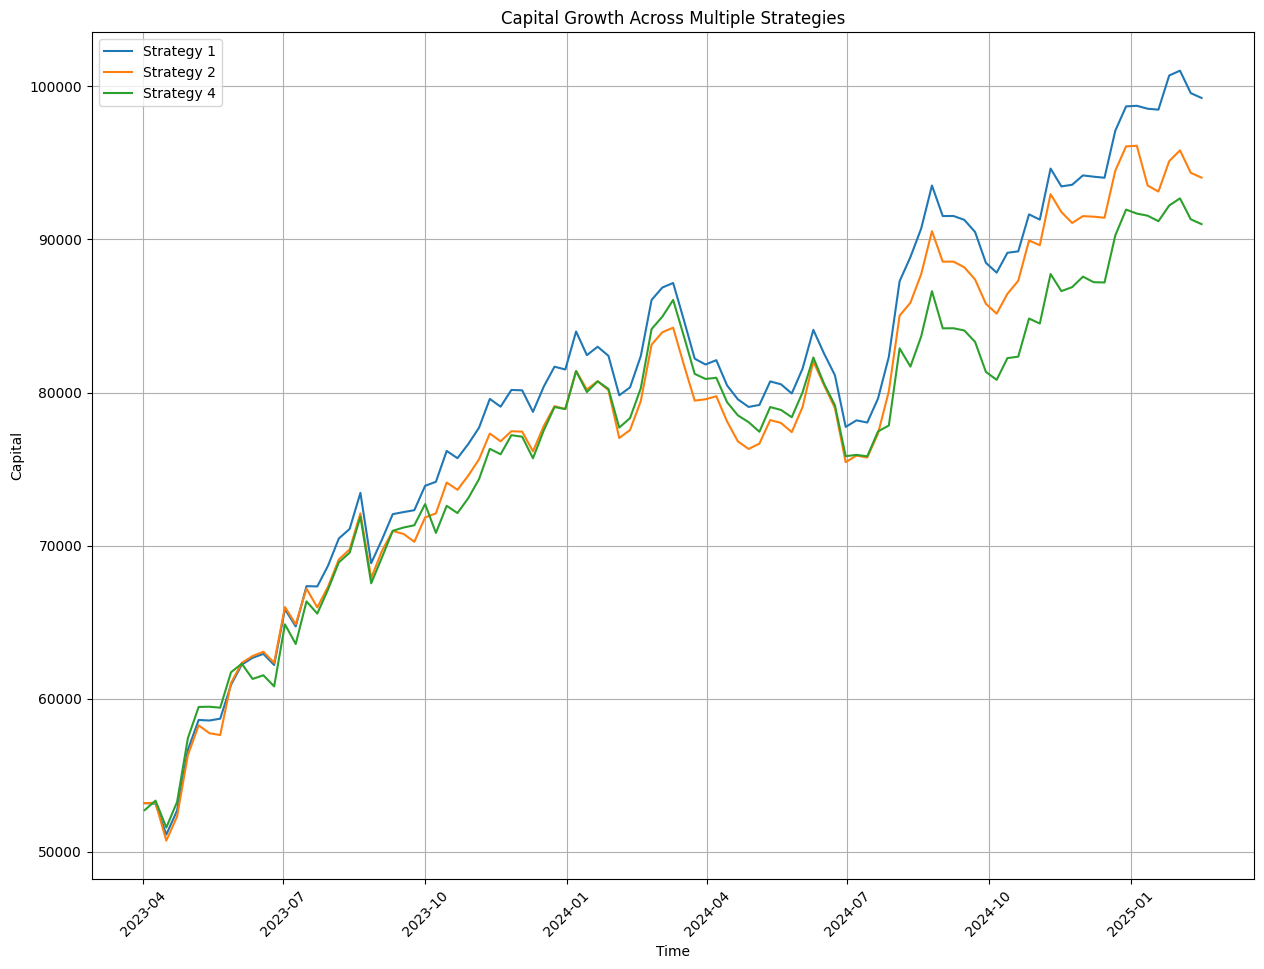

In [5]:
from processing_functions import plot_backtested_return_curve
plot_backtested_return_curve(pathOfData='trade_datas/'+filepath,
                             plotAllDatas=False, dataIdsSelected=[1,2,4],
                             plotSize=(15,11))

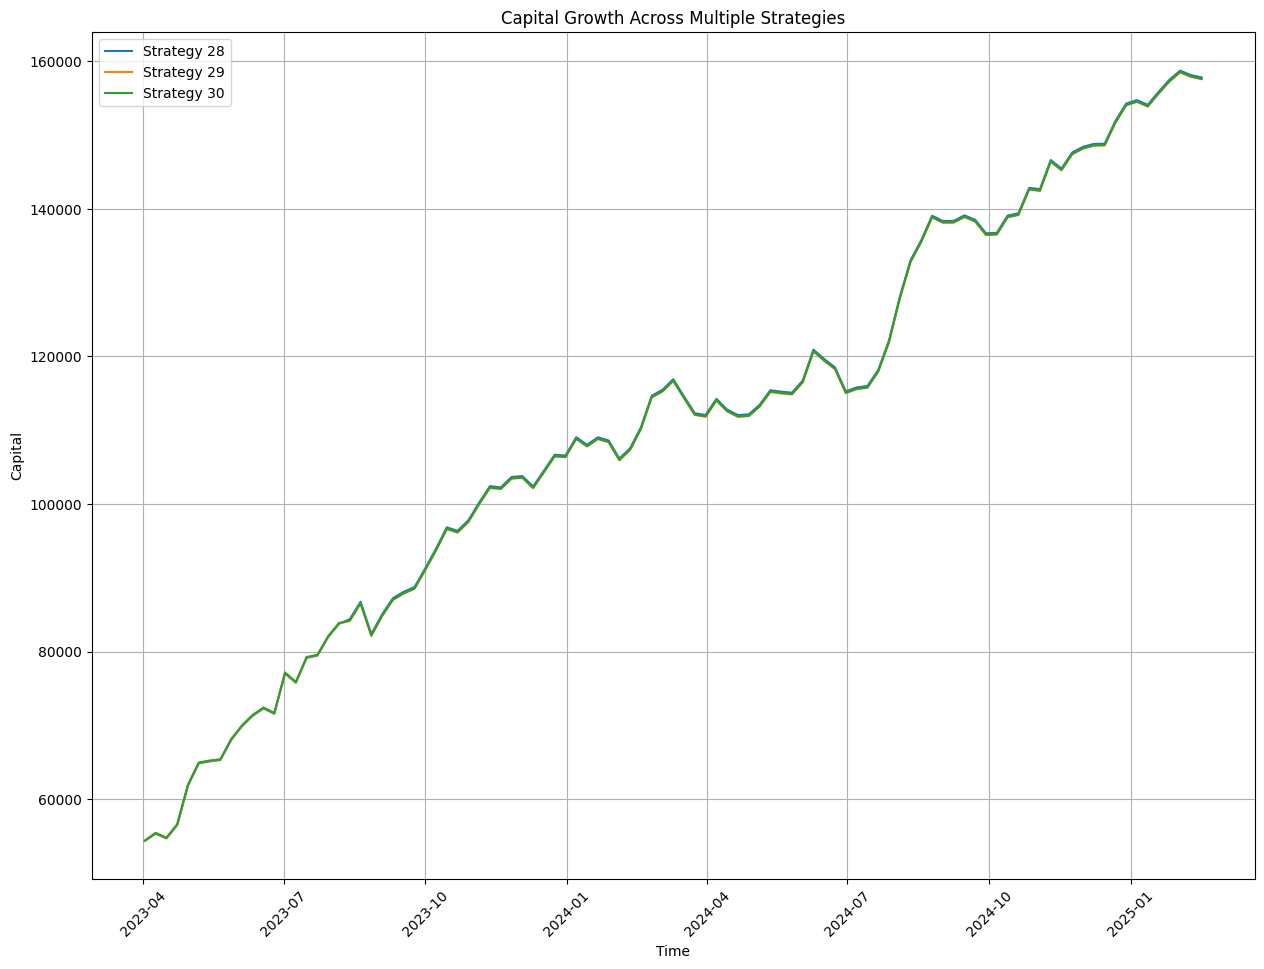

In [2]:
from processing_functions import plot_backtested_return_curve
plot_backtested_return_curve(pathOfData='trade_datas/'+filepath,
                             plotAllDatas=False, dataIdsSelected=[28,29,30],
                             plotSize=(15,11))

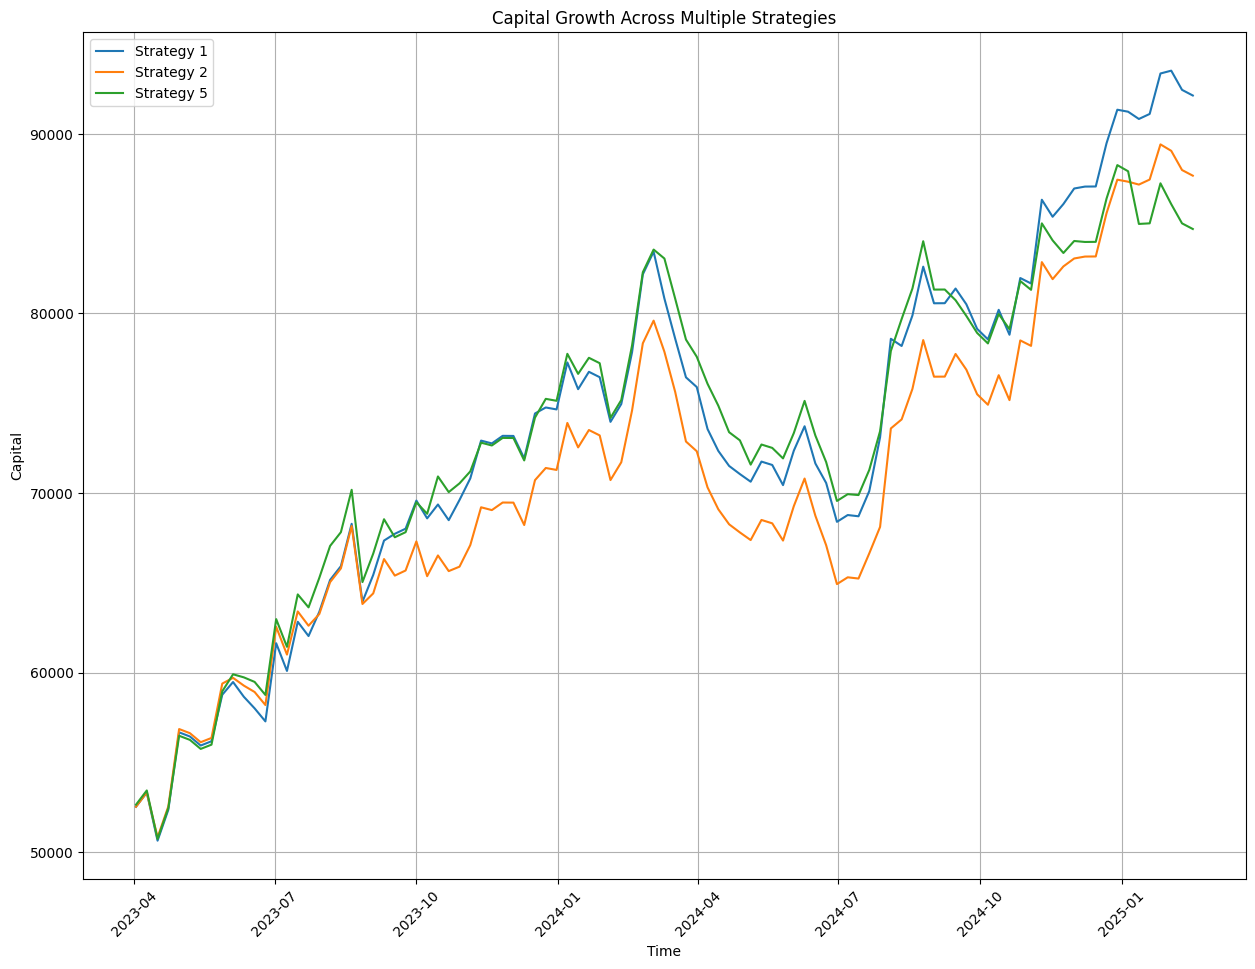

In [12]:
from processing_functions import plot_backtested_return_curve
plot_backtested_return_curve(pathOfData='trade_datas/'+filepath,
                             plotAllDatas=False, dataIdsSelected=[1, 2, 5],
                             plotSize=(15,11))

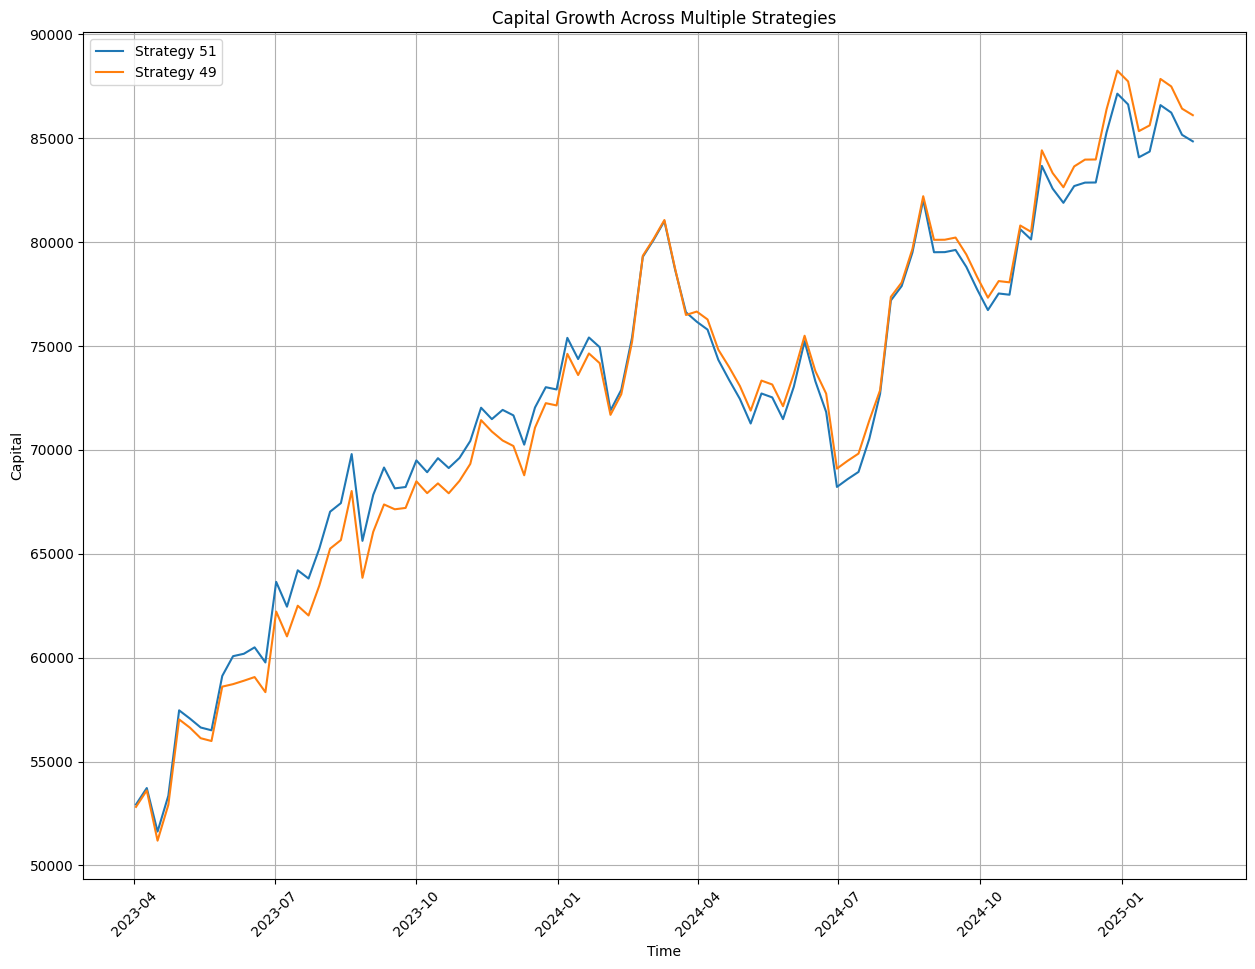

In [7]:
from processing_functions import plot_backtested_return_curve
plot_backtested_return_curve(pathOfData='trade_datas/'+filepath,
                             plotAllDatas=False, dataIdsSelected=[51, 49],
                             plotSize=(15,11))

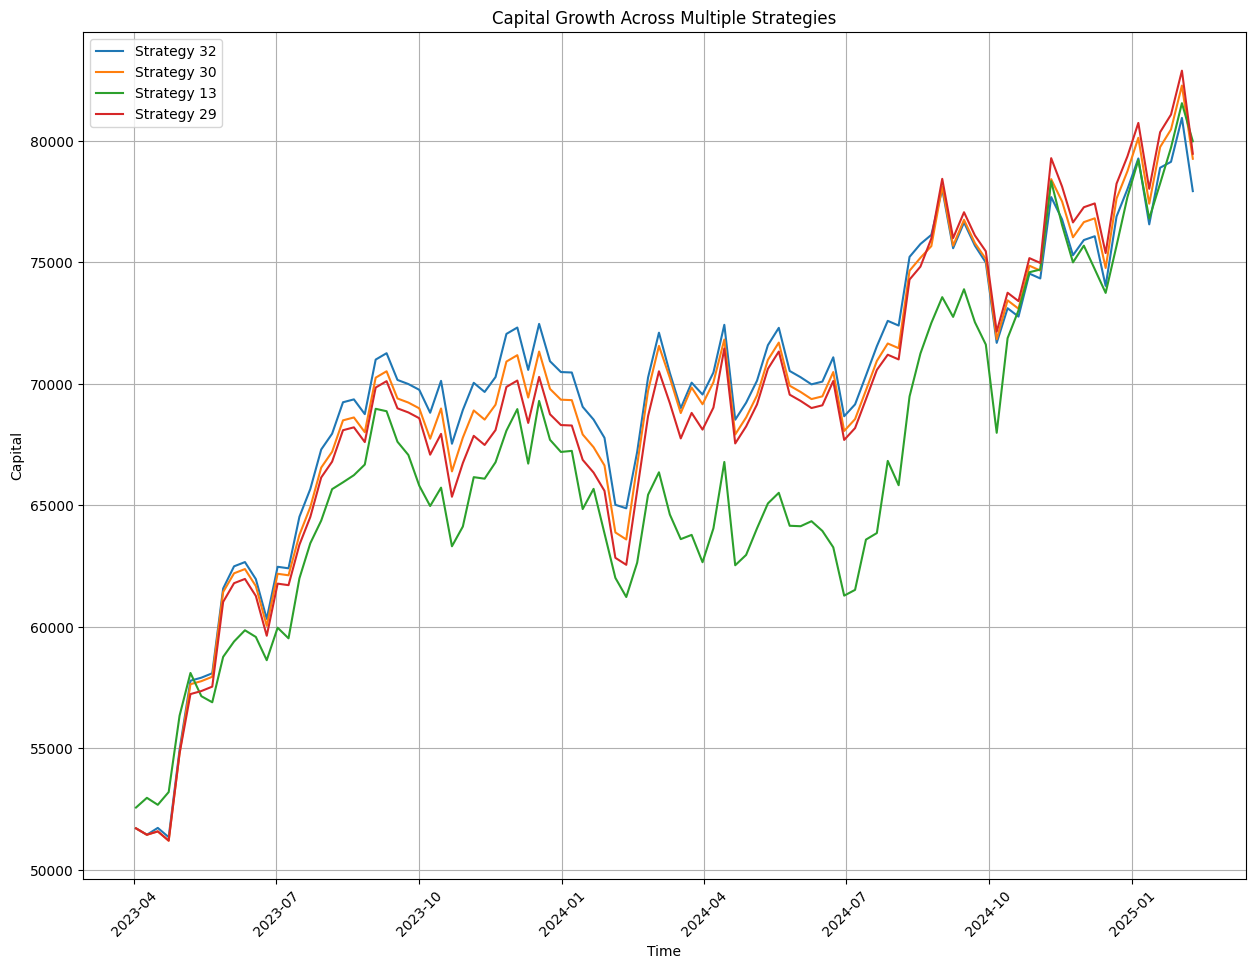

In [2]:
from processing_functions import plot_backtested_return_curve
plot_backtested_return_curve(pathOfData='trade_datas/'+filepath,
                             plotAllDatas=False, dataIdsSelected=[32,30,13,29],
                             plotSize=(15,11))

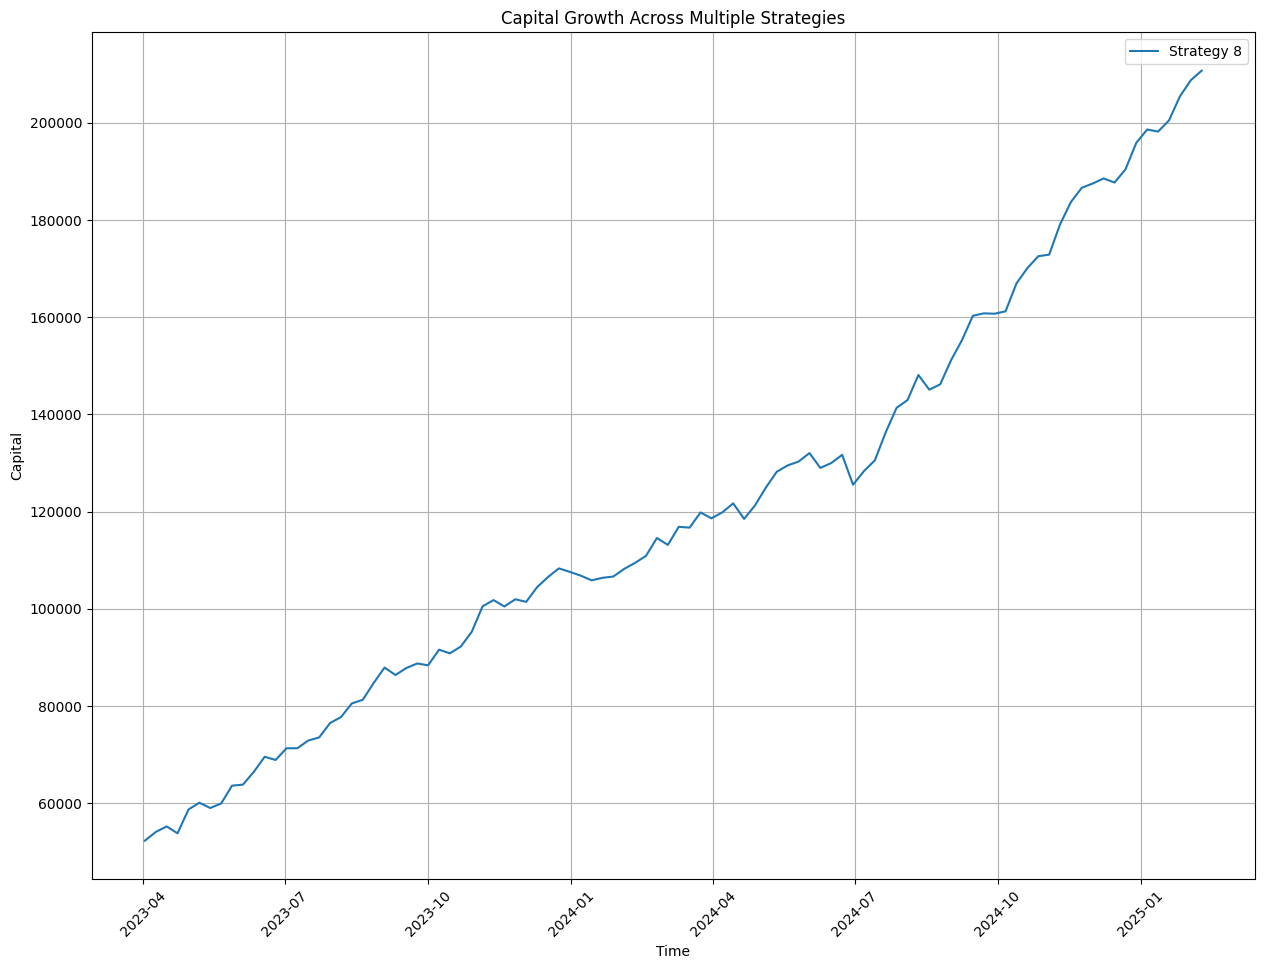

In [3]:
from processing_functions import plot_backtested_return_curve
plot_backtested_return_curve(pathOfData='trade_datas/'+filepath,
                             plotAllDatas=False, dataIdsSelected=[8],
                             plotSize=(15,11))

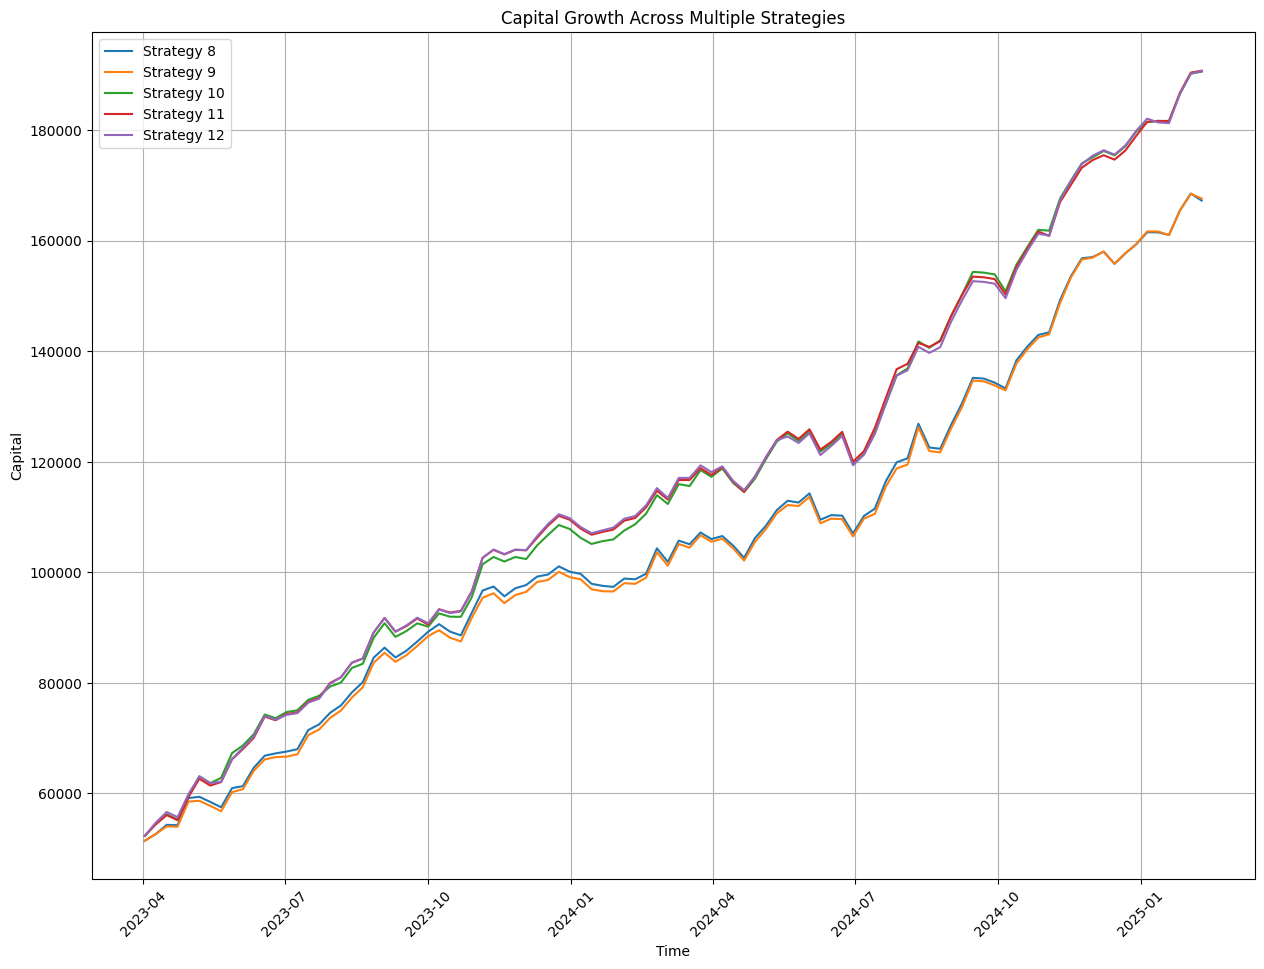

In [2]:
from processing_functions import plot_backtested_return_curve
plot_backtested_return_curve(pathOfData='trade_datas/'+filepath,
                             plotAllDatas=False, dataIdsSelected=[8,9,10,11,12],
                             plotSize=(15,11))

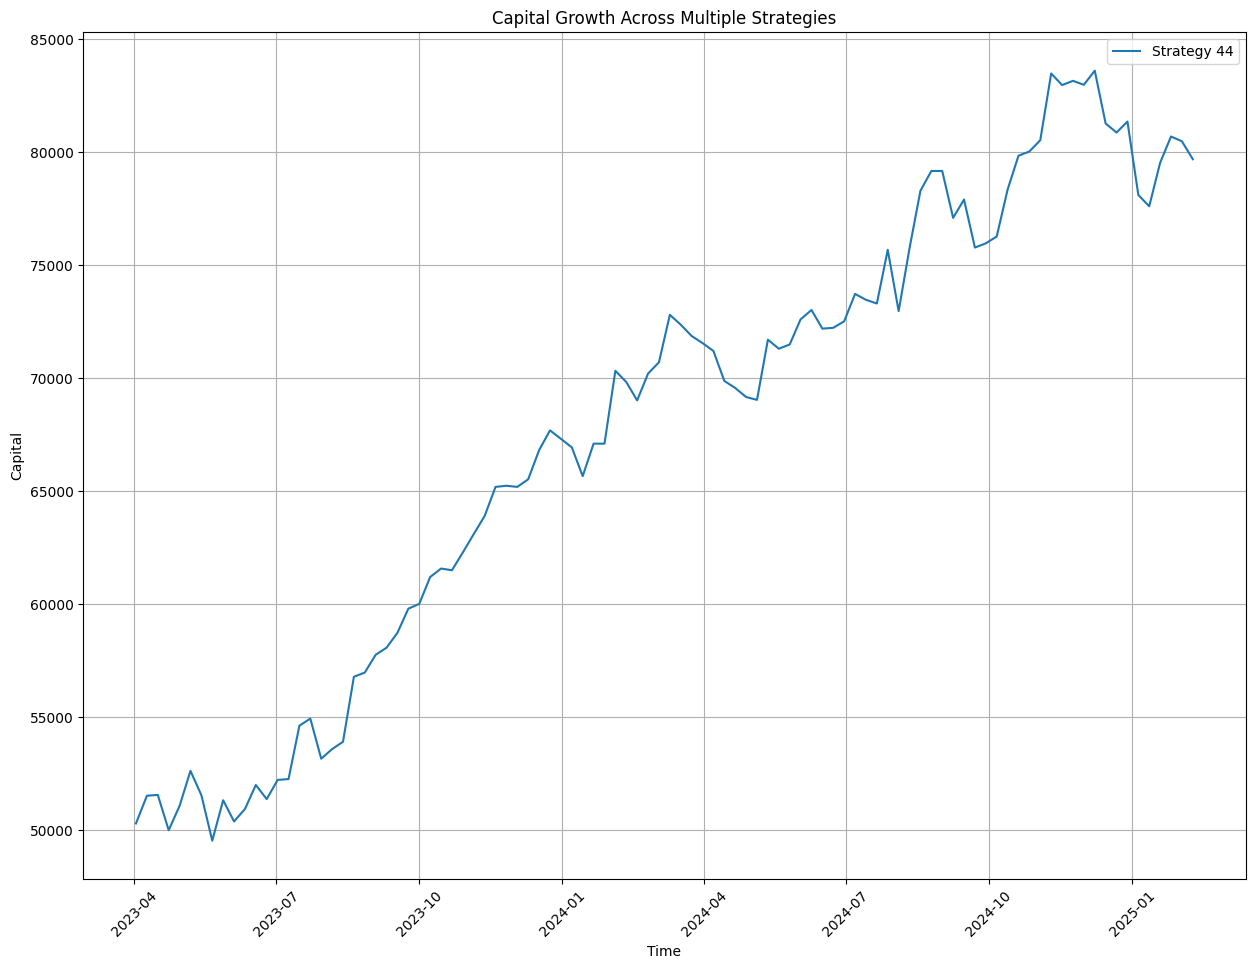

In [2]:
from processing_functions import plot_backtested_return_curve
plot_backtested_return_curve(pathOfData='trade_datas/'+filepath,
                             plotAllDatas=False, dataIdsSelected=[44],
                             plotSize=(15,11))

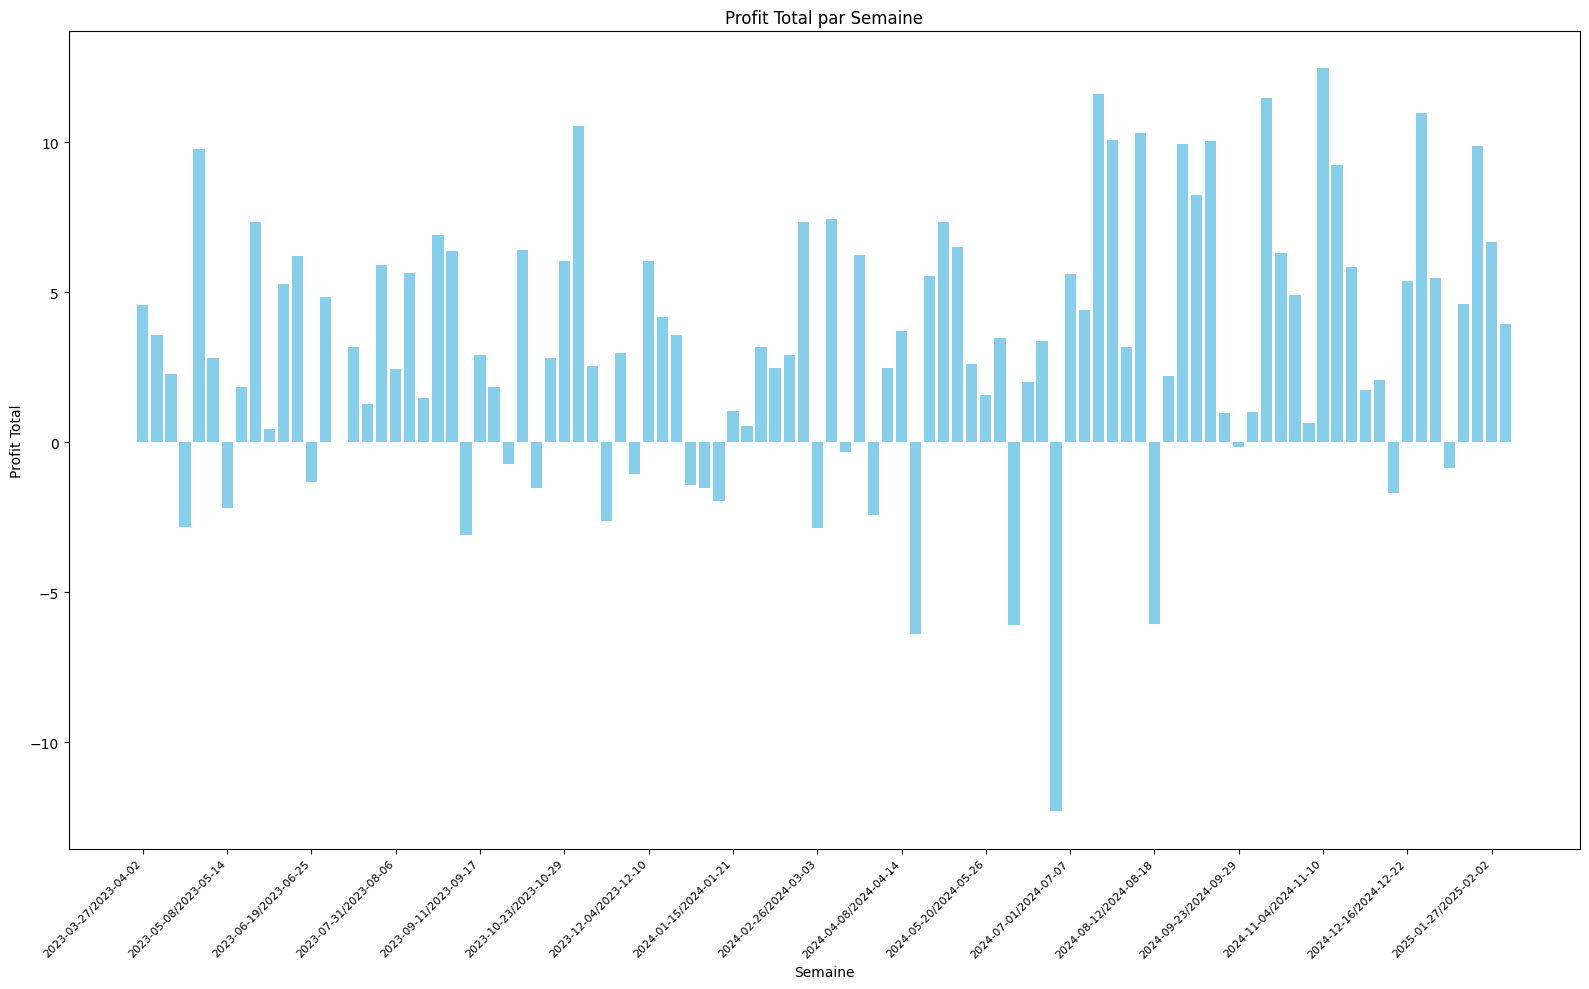

In [4]:
from processing_functions import plot_bars_of_profit_for_every_weeks
plot_bars_of_profit_for_every_weeks(filepath, 8)

Nouvelles choses à tester : 
- condition de sorties supp. si on a un grand doji/marteau/pendu (***) => fait! : résultats mauvais
- rajouter la possibilité de déplacer le TP si le profit continu. Peut etre avec la tenkan ou avec un autre indicateur? l'ATR? (***)
- stop loss suiveur avec tenkan? => méthode 4; retester avec les méthodes et sans slModifers(**) 
- restester sans niveau de pivot (**)
- rajouter une condition sur la taille de la bougie d'entrée = pas de trade si trop grande (**)
- tester d'augmenter la plage horraire de trading <7h ou >20h (**)
- analyser les heures les moins rentables = forbideenHours (**) 
- raffiner les niveaux de slModifiers/sl/tp (*)
- rajouter les niveaux du plus bas/plus haut journalier aux conditions d'entré (*)

choses à faire pour continuer à backtest :
- appliquer des conditions sur le temps de trade
    - ex : si on est en trade depuis plus de x min on stop
    - ex : si on est en zone rouge depuis plus de y min on stop


méthodes à tester maintenant :
- l'ATR défini notre niveau de TP (tester niveau de TP = atrRatio [2,3,4,5])
- la pente de l'ATR défini si on place un TP définitif, ex : si la pente de l'ATR < X et que prix actuel >= 90% TP initial on ne déplace plus le TP